# Motivation

I have chosen two datasets for this project. They can both be downloaded from [the city of Melbourne opendata](https://data.melbourne.vic.gov.au/). The data comes from different kind of sensors located at Argyle Square, which is a small park located in Melbourne Australia. 

One dataset is the [blix-visits](https://data.melbourne.vic.gov.au/explore/dataset/blix-visits/information/?sort=datetime) which is a [pedestrian sensor](https://hdp-au-prod-app-com-participate-files.s3.ap-southeast-2.amazonaws.com/9616/5180/4859/Data_in_the_park_Argyle_Square_map.pdf?utm_source=chatgpt.com) and counts WiFi devices in a range of 30m radius from its location. 
The other is the [benches usage data](https://data.melbourne.vic.gov.au/explore/dataset/guppy/information/?disjunctive.dev_id). There are two benches located at the park which are provided each with two [bench movement sensors](https://hdp-au-prod-app-com-participate-files.s3.ap-southeast-2.amazonaws.com/9616/5180/4859/Data_in_the_park_Argyle_Square_map.pdf?utm_source=chatgpt.com) which detects when people sit on the bench. These sensors also measure the temperature when the bench is at use. 

I chose to work with these two datasets because they acquire some very specific data about peoples behavior at a park. The two datasets would also work well together since I could explore not only how many people are at the park but also how many use the park to hang out in. I also found it very interesting to figure out why there were so much data for this specific small park. I found out the park was chosen to be a [smart park](https://participate.melbourne.vic.gov.au/emerging-tech-testbed/data-park) and there are actually a lot more data and sensors to explore in this small park.

My goal for the end user’s experience is to have found the data explored interesting. I hope to draw peoples attention to this small culture park in Melbourne. It would be awesome if one thought “Wow, I didn’t know observation pattens from such a small place could tell so much about the people using the park”. I also hope the interactive plots invite the reader to explore further and maybe discover other pattens in the data which hasn’t been mentioned.


# Basic stats

Firstly, I chose to work on the two datasets separately. The codes can be found in the folder [My final project codes](https://github.com/s194384/s194384.github.io/tree/main/My%20final%20project%20codes) under the names *blix-visits.ipynb* and *Benches.ipynb*. Then after the cleaning and preprocessing were done I made some plots combining the cleaned datasets which can be found [in the same folder](https://github.com/s194384/s194384.github.io/tree/main/My%20final%20project%20codes) under the name *Combined.ipynb*.

For convenience I have also copied the relevant code from the different files into this explainer notebook.

**Please notice:** Since the main coding is done in other files as explained above, I have commented out everytime plots or datasets are being saved.

### Blix-visits basic stats

After importing all the different packages used, I imported the data and displayed the total number of rows, columns and a header to better understand the dataset.

In [78]:
import pandas as pd #To import data

# For heat map
import folium
from folium.plugins import HeatMap, HeatMapWithTime

# Calenderplot
import calplot

# Plots
import numpy as np # used for polar plot
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors # Creating color bar

# Box plot
import seaborn as sns

# Specify the full path to the CSV file
file_path = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\blix-visits.csv"

# Read data from the specified file
df = pd.read_csv(file_path)

# Counts rows and columns
print(f"Total number of rows: {df.shape[0]}")
print(f"Total number of columns: {df.shape[1]}")

# Preview the first 5 lines of the loaded data
df.head()

Total number of rows: 122758
Total number of columns: 8


datetime  venueId  total  dwell  \
0  2022-12-16T13:00:00+11:00     7779    217  52297   
1  2022-12-16T13:00:00+11:00     8171     48   9840   
2  2022-12-16T05:00:00+11:00     8171      6   1800   
3  2022-12-16T16:00:00+11:00     8171     95  52155   
4  2022-12-16T07:00:00+11:00     8168      0      0   

                        Sensor Name            Sensor Type  \
0     Pedestrian Sensor- Harbur Esp  Mobile phone counting   
1  Pedestrian Sensor-Birrarung Marr  Mobile phone counting   
2  Pedestrian Sensor-Birrarung Marr  Mobile phone counting   
3  Pedestrian Sensor-Birrarung Marr  Mobile phone counting   
4     Pedestrian Sensor - Microlabs  Mobile phone counting   

                   Lat Long  avg_dwell  
0  -37.8144123, 144.9443643        4.0  
1  -37.8209898, 144.9759397        3.0  
2  -37.8209898, 144.9759397        5.0  
3  -37.8209898, 144.9759397        9.0  
4  -37.8132759, 144.9670433        NaN

I quickly discovered when I did further plots and maps that there were invalid data. Therefore I removed all the NaN data which turned out to remove 25,133 rows of data.

In [79]:
df_cleaned = df.dropna(subset=['Sensor Name', 'Sensor Type', 'Lat Long'])

# Save
df_cleaned.to_csv("blix-visits_cleaned.csv", index=False)

print(f"Total number of rows: {df_cleaned.shape[0]}")
print(f"Total number of columns: {df_cleaned.shape[1]}")

df_cleaned.head()

Total number of rows: 97625
Total number of columns: 8


datetime  venueId  total  dwell  \
0  2022-12-16T13:00:00+11:00     7779    217  52297   
1  2022-12-16T13:00:00+11:00     8171     48   9840   
2  2022-12-16T05:00:00+11:00     8171      6   1800   
3  2022-12-16T16:00:00+11:00     8171     95  52155   
4  2022-12-16T07:00:00+11:00     8168      0      0   

                        Sensor Name            Sensor Type  \
0     Pedestrian Sensor- Harbur Esp  Mobile phone counting   
1  Pedestrian Sensor-Birrarung Marr  Mobile phone counting   
2  Pedestrian Sensor-Birrarung Marr  Mobile phone counting   
3  Pedestrian Sensor-Birrarung Marr  Mobile phone counting   
4     Pedestrian Sensor - Microlabs  Mobile phone counting   

                   Lat Long  avg_dwell  
0  -37.8144123, 144.9443643        4.0  
1  -37.8209898, 144.9759397        3.0  
2  -37.8209898, 144.9759397        5.0  
3  -37.8209898, 144.9759397        9.0  
4  -37.8132759, 144.9670433        NaN

As one will notice from the header there are different latitude and longitude values. Therefore I made a heat map to investigate further.

In [80]:
# Coordinates for Melbourne (Googled)
mel_latitude = -37.840935
mel_longitude = 144.946457

# Create a map centered on Melbourne
mel_map = folium.Map(location=[mel_latitude, mel_longitude], zoom_start=13)
mel_map = folium.Map(location=[mel_latitude, mel_longitude], zoom_start=13)

# Motify the data
df_cleaned[['Latitude', 'Longitude']] = df_cleaned['Lat Long'].str.split(',', expand=True).astype(float) #splits to float

# Prepare data for the heatmap
heat_data = df_cleaned[['Latitude', 'Longitude']].values.tolist()

# Add the heatmap to the map
HeatMap(heat_data, radius=10, blur=5).add_to(mel_map)

# Display the map
mel_map

C:\Users\Bruger\AppData\Local\Temp\ipykernel_13756\1589981214.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Latitude', 'Longitude']] = df_cleaned['Lat Long'].str.split(',', expand=True).astype(float) #splits to float
C:\Users\Bruger\AppData\Local\Temp\ipykernel_13756\1589981214.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Latitude', 'Longitude']] = df_cleaned['Lat Long'].str.split(',', expand=True).astype(float) #splits to float


I found out how many other sensors are attached to this dataset. 

In [81]:
unique_coordinates = df['Lat Long'].dropna().unique()
num_unique_coordinates = len(unique_coordinates)
unique_coordinates, num_unique_coordinates

(array(['-37.8144123, 144.9443643', '-37.8209898, 144.9759397',
        '-37.8132759, 144.9670433', '-37.8303795, 144.9735707',
        '-37.8025805, 144.9656012', '-37.8304842, 144.9732589'],
       dtype=object),
 6)

For me it was a bit difficult to tell where on the heatmap the 6 sensors were located. Especially since I could only count five spots on the heat map. Therefore the following map was produced to figure out at what exact locations the sensors for the park were. When clicking on the marks it would display the location of that sensor.

In [82]:
# Start map
map_center = [-37.815, 144.97]
m = folium.Map(location=map_center, zoom_start=14)

# Add markers
for coord in unique_coordinates:
    lat, lon = map(float, coord.split(','))
    folium.Marker(location=[lat, lon], popup=coord).add_to(m)

# Show map (in Jupyter Notebook)
m

Now I cleaned the dataset to only cover the sensor for the park. I also found out I could have used the sensor name to clear the dataset. But I enjoyed to produce the different maps as it gave me better visiual insights and understanding of the dataset.

Of course I made a header for the cleaned dataset as well to make sure everything was in order.

In [83]:
#This is the coordinates for the park -37.8025805, 144.9656012

#These two codes do the same thing:
#df_park = df_cleaned[df_cleaned['Lat Long'] == '-37.8025805, 144.9656012']
df_park = df_cleaned[df_cleaned['Sensor Name'] == 'Pedestrian Sensor-Argyle Sq']

print(f"Total number of rows: {df_park.shape[0]}")
print(f"Total number of columns: {df_park.shape[1]}")

df_park.head()

Total number of rows: 20336
Total number of columns: 10


datetime  venueId  total   dwell  \
7   2022-12-16T21:00:00+11:00     7780    422  107188   
18  2022-12-23T14:00:00+11:00     7780    351  170937   
19  2022-12-23T21:00:00+11:00     7780    504  193032   
30  2022-12-28T03:00:00+11:00     7780     13    2574   
31  2022-12-28T04:00:00+11:00     7780      5    2340   

                    Sensor Name            Sensor Type  \
7   Pedestrian Sensor-Argyle Sq  Mobile phone counting   
18  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
19  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
30  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
31  Pedestrian Sensor-Argyle Sq  Mobile phone counting   

                    Lat Long  avg_dwell  Latitude   Longitude  
7   -37.8025805, 144.9656012        4.0 -37.80258  144.965601  
18  -37.8025805, 144.9656012        8.0 -37.80258  144.965601  
19  -37.8025805, 144.9656012        6.0 -37.80258  144.965601  
30  -37.8025805, 144.9656012        3.0 -37.80258  144.965601  
31  -37.8025805, 144.9656012        7.0 -37.80258  144.965601

To better understand the dataset I made some calender plots. This would give me insight on how many years the dataset covered, important dates, any missing data, and other outliers. First I made a calender plot for the total and then for the average dwell time (avg_dwell).

But first it was important to do a little more preprocessing. It is important for the program to know that the date was a "date"-value and the time was a "time"-value.

In [84]:
df_park['datetime'] = pd.to_datetime(df_park['datetime'], utc=True)
df_park['datetime'] = df_park['datetime'].dt.tz_convert('Australia/Melbourne')

df_park['date'] = df_park['datetime'].dt.date
df_park['time'] = df_park['datetime'].dt.time


print(f"Total number of rows: {df_park.shape[0]}")
print(f"Total number of columns: {df_park.shape[1]}")


df_park.head()

Total number of rows: 20336
Total number of columns: 12


C:\Users\Bruger\AppData\Local\Temp\ipykernel_13756\2206221068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_park['datetime'] = pd.to_datetime(df_park['datetime'], utc=True)
C:\Users\Bruger\AppData\Local\Temp\ipykernel_13756\2206221068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_park['datetime'] = df_park['datetime'].dt.tz_convert('Australia/Melbourne')
C:\Users\Bruger\AppData\Local\Temp\ipykernel_13756\2206221068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

datetime  venueId  total   dwell  \
7  2022-12-16 21:00:00+11:00     7780    422  107188   
18 2022-12-23 14:00:00+11:00     7780    351  170937   
19 2022-12-23 21:00:00+11:00     7780    504  193032   
30 2022-12-28 03:00:00+11:00     7780     13    2574   
31 2022-12-28 04:00:00+11:00     7780      5    2340   

                    Sensor Name            Sensor Type  \
7   Pedestrian Sensor-Argyle Sq  Mobile phone counting   
18  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
19  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
30  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
31  Pedestrian Sensor-Argyle Sq  Mobile phone counting   

                    Lat Long  avg_dwell  Latitude   Longitude        date  \
7   -37.8025805, 144.9656012        4.0 -37.80258  144.965601  2022-12-16   
18  -37.8025805, 144.9656012        8.0 -37.80258  144.965601  2022-12-23   
19  -37.8025805, 144.9656012        6.0 -37.80258  144.965601  2022-12-23   
30  -37.8025805, 144.9656012        3.0 -37.80258  144.965601  2022-12-28   
31  -37.8025805, 144.9656012        7.0 -37.80258  144.965601  2022-12-28   

        time  
7   21:00:00  
18  14:00:00  
19  21:00:00  
30  03:00:00  
31  04:00:00

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1000x510 with 3 Axes>,
 array([<Axes: ylabel='2022'>, <Axes: ylabel='2023'>,
        <Axes: ylabel='2024'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


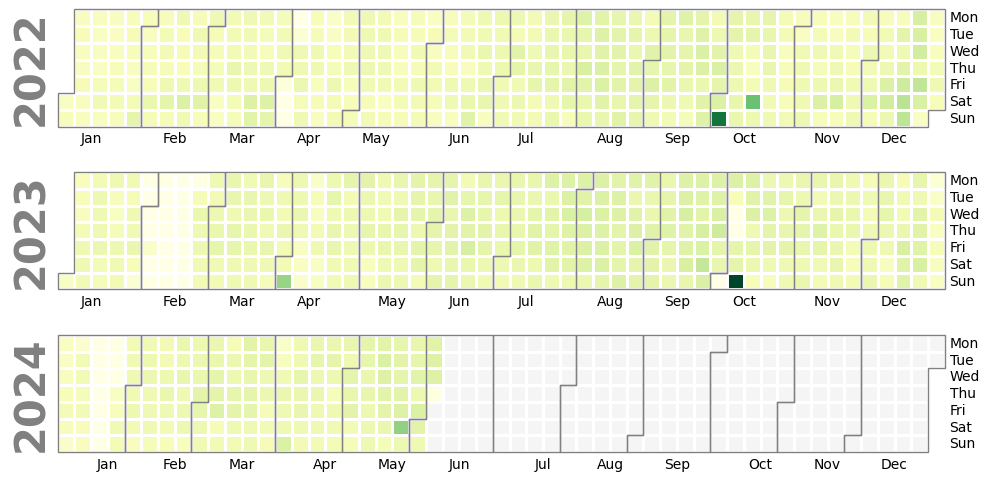

In [85]:
## Plots total

# Group and create event series
events = df_park.groupby('date')['total'].sum()
events.index = pd.to_datetime(events.index)

# Plot
calplot.calplot(events, cmap='YlGn', colorbar=False)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1000x510 with 3 Axes>,
 array([<Axes: ylabel='2022'>, <Axes: ylabel='2023'>,
        <Axes: ylabel='2024'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


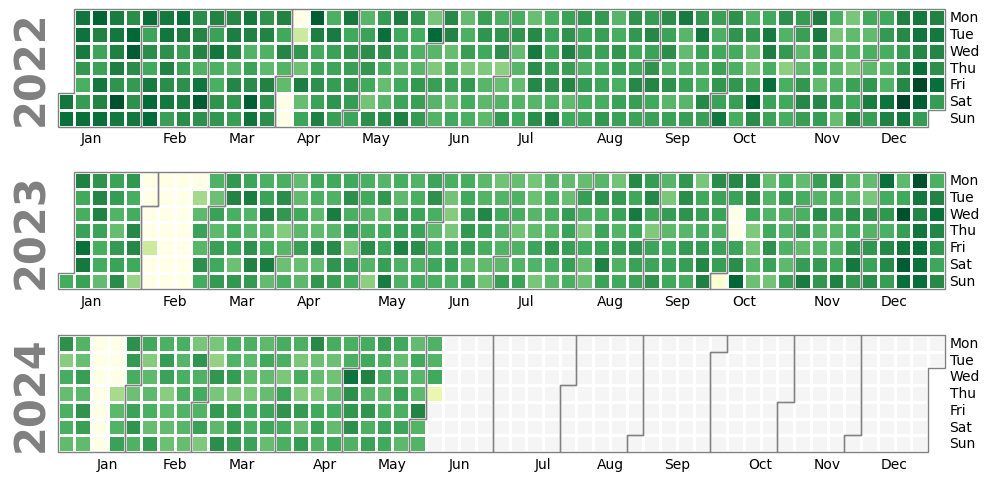

In [86]:
## Plots avg_dwell

# Group and create event series
events = df_park.groupby('date')['avg_dwell'].sum()

events.index = pd.to_datetime(events.index)

# Plot
calplot.calplot(events, cmap='YlGn', colorbar=False)

I also split the data into the different years; 2022, 2023 and 2024

In [ ]:
# Save only for the year 2022
df_2022 = df_park[df_park['datetime'].dt.year == 2022].copy()
df_2022['date'] = df_2022['datetime'].dt.date
df_2022['hour'] = df_2022['datetime'].dt.hour

# Save only for the year 2023
df_2023 = df_park[df_park['datetime'].dt.year == 2023].copy()
df_2023['date'] = df_2023['datetime'].dt.date
df_2023['hour'] = df_2023['datetime'].dt.hour

# For the year 2024 there were only data for half of the year.
#Therefore I didn't explore that part of the data too much and just made a
#simple split of the data
df_2024 = df_park[df_park['datetime'].dt.year == 2024].copy()

To better understand how the data distributed over the days of the week I did the following data preprocessing.

In [88]:
df_park['weekday'] = df_park['datetime'].dt.day_name()

C:\Users\Bruger\AppData\Local\Temp\ipykernel_13756\1874166426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_park['weekday'] = df_park['datetime'].dt.day_name()


For the time plots (polar plots) I made a new column in the dataset called "hour".

In [89]:
df_park['hour'] = pd.to_datetime(df_park['datetime']).dt.hour

C:\Users\Bruger\AppData\Local\Temp\ipykernel_13756\58034904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_park['hour'] = pd.to_datetime(df_park['datetime']).dt.hour


Another thing I really explored a lot was why the avg_dwell time was so high at 4 am. I discovered the high avg_dwell time at 4 am by making the following plot.

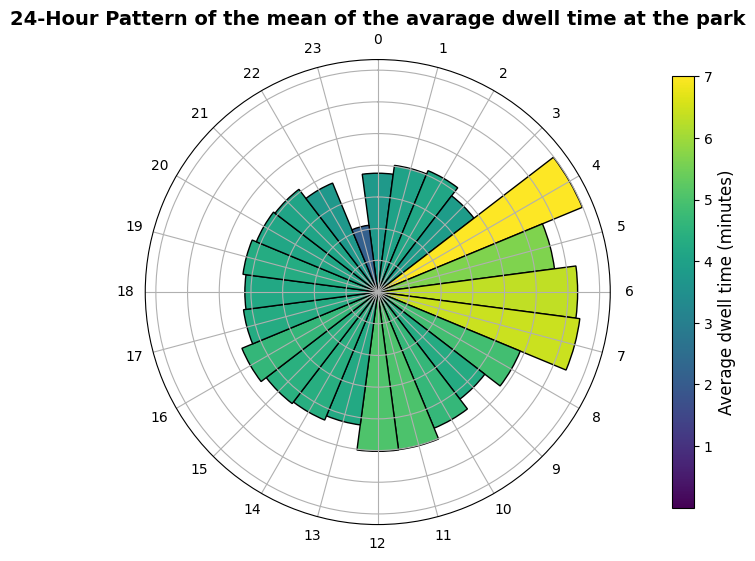

In [90]:
hours = df_park.groupby('hour')['avg_dwell'].mean()


angles = np.linspace(0, 2 * np.pi, len(hours), endpoint=False)
widths = np.pi / 12 
colors = plt.cm.viridis(hours.values / hours.values.max())

# Plot settings
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
bars = ax.bar(angles, hours.values, width=widths, color=colors, edgecolor='black')

# Make the chart look like a clock
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

# Add a color bar
sm = plt.cm.ScalarMappable(cmap='viridis',norm=mcolors.Normalize(0, 7))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.7, pad=0.1)
cbar.set_label('Average dwell time (minutes)',fontsize=12)
cbar.set_ticks([1, 2, 3, 4, 5, 6, 7])  # Explicit indication of ticks
#cbar.set_ticks(np.arange(hours.values.min(), hours.values.max() + 1, 1))

# Set labels and title
ax.set_xticks(angles)
ax.set_xticklabels(hours.index, fontsize=10)
ax.set_yticklabels([])
ax.set_title('24-Hour Pattern of the mean of the avarage dwell time at the park', fontsize=14, fontweight='bold')

# Show plot
plt.show()

I was curious to see if the time of day with the highest avg_dwell time differed over the seasons of the year. Therefore the following two plots were produced. 

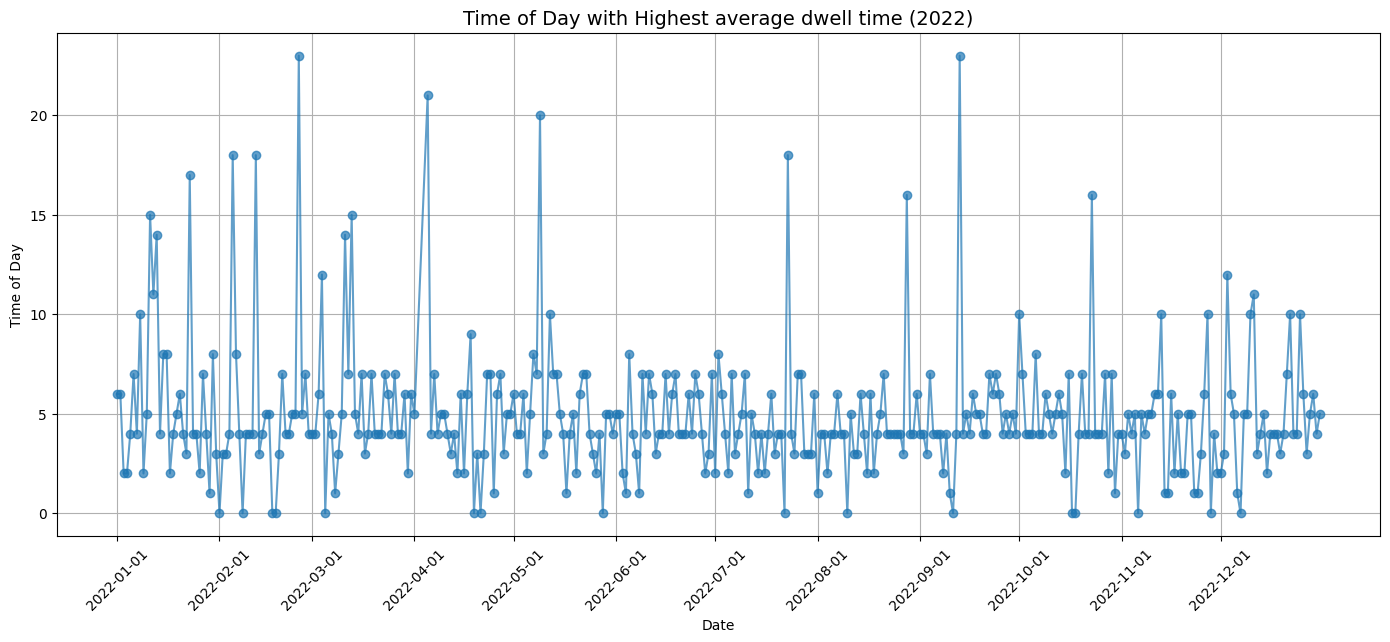

In [91]:
daily_peak_hour_2022 = df_2022.groupby(['date', 'hour'])['avg_dwell'].mean().unstack().idxmax(axis=1)
daily_peak_hour_2022 = daily_peak_hour_2022.sort_index()

plt.figure(figsize=(14, 6))
plt.plot(daily_peak_hour_2022.index, daily_peak_hour_2022.values, marker='o', linestyle='-', alpha=0.7)
plt.title('Time of Day with Highest average dwell time (2022)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Time of Day')
plt.grid(True)
plt.tight_layout()
monthly_ticks = pd.date_range(start=daily_peak_hour_2022.index.min(),
                              end=daily_peak_hour_2022.index.max(),
                              freq='MS')  # 'MS' = Month Start
plt.xticks(monthly_ticks, rotation=45)
plt.show()

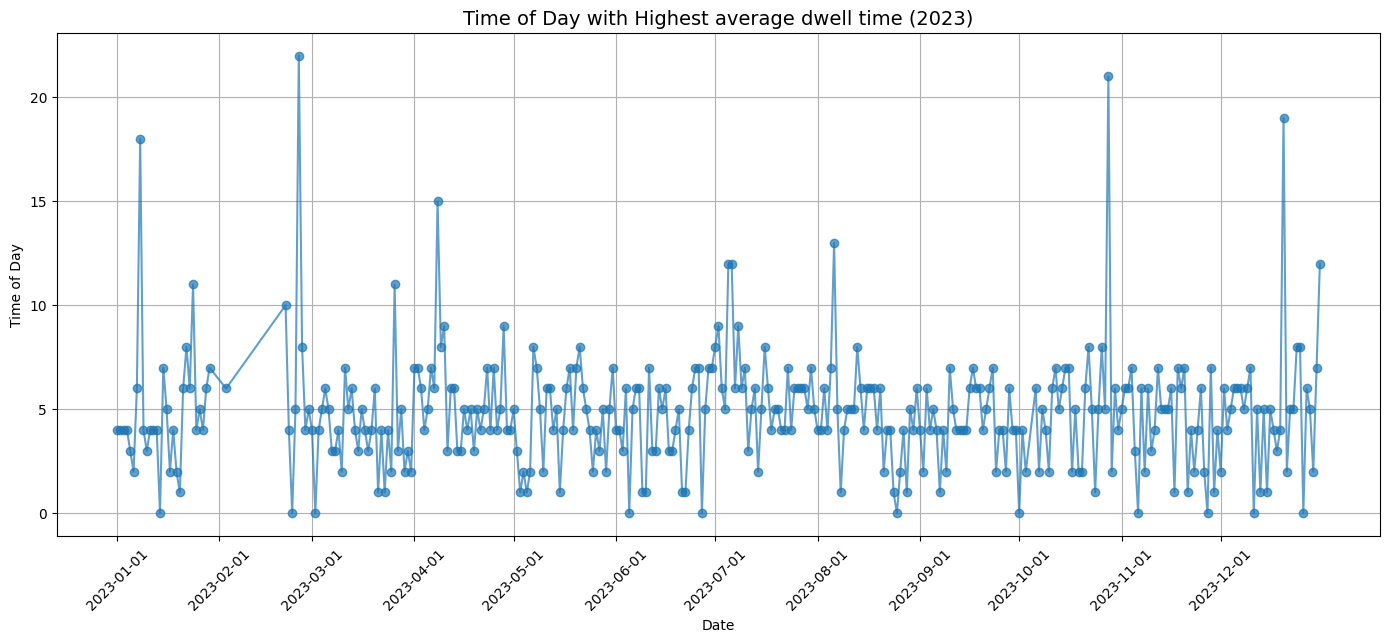

In [92]:
daily_peak_hour_2023 = df_2023.groupby(['date', 'hour'])['avg_dwell'].mean().unstack().idxmax(axis=1)
daily_peak_hour_2023 = daily_peak_hour_2023.sort_index()

plt.figure(figsize=(14, 6))
plt.plot(daily_peak_hour_2023.index, daily_peak_hour_2023.values, marker='o', linestyle='-', alpha=0.7)
plt.title('Time of Day with Highest average dwell time (2023)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Time of Day')
plt.grid(True)
plt.tight_layout()
monthly_ticks = pd.date_range(start=daily_peak_hour_2023.index.min(),
                              end=daily_peak_hour_2023.index.max(),
                              freq='MS')  # 'MS' = Month Start
plt.xticks(monthly_ticks, rotation=45)
plt.show()

One will notice there weren't any difference in the seasons of the year. Therefore I turned to google and tried to find out why. As one can read on the website I found out that the district the park was located in has been and still is a rough neighbourhood. This could explain the high numbers of avg_dwell time. It is relatively normal for rough districts to have a few individuals dwell in the streets and/or at parks longer doing the night. 

Lastly I saved the cleaned and preprocessed datasets

In [93]:
'''
visits_df = df_park
visits_df_2022 = df_2022
visits_df_2023 = df_2023
visits_df_2024 = df_2024

visits_df.to_csv("visits_df.csv", index=False)
visits_df_2022.to_csv("visits_df_2022.csv", index=False)
visits_df_2023.to_csv("visits_df_2023.csv", index=False)
visits_df_2024.to_csv("visits_df_2024.csv", index=False)
'''

'\nvisits_df = df_park\nvisits_df_2022 = df_2022\nvisits_df_2023 = df_2023\nvisits_df_2024 = df_2024\n\nvisits_df.to_csv("visits_df.csv", index=False)\nvisits_df_2022.to_csv("visits_df_2022.csv", index=False)\nvisits_df_2023.to_csv("visits_df_2023.csv", index=False)\nvisits_df_2024.to_csv("visits_df_2024.csv", index=False)\n'

### Benches basic stats

For this file and data set packes were first imported and of course then the dataset itself.

In [94]:
import pandas as pd #To import data
import numpy as np

# For map
import folium 
from folium.plugins import HeatMap, HeatMapWithTime

# For plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors # Creating color bar
import seaborn as sns # Historgram

# For bokeh plots
from bokeh.plotting import figure, show
from bokeh.palettes import Category10
from bokeh.models import ColumnDataSource, Legend, LegendItem
from bokeh.io import output_file

In [95]:
# Specify the full path to the CSV file
file_path = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\Benches.csv"

# Read data from the specified file
df = pd.read_csv(file_path)

# Counts rows and columns
print(f"Total number of rows: {df.shape[0]}")
print(f"Total number of columns: {df.shape[1]}")

# Preview the first 5 lines of the loaded data
df.head()

Total number of rows: 212122
Total number of columns: 13


time         Sensor Location      dev_id  \
0  2022-12-20T08:08:03+01:00  Seat Asset ID: 1119882  guppy-2308   
1  2022-12-20T08:23:11+01:00  Seat Asset ID: 1119051  guppy-2340   
2  2022-12-20T08:43:27+01:00  Seat Asset ID: 1119882  guppy-2332   
3  2022-12-21T00:21:40+01:00  Seat Asset ID: 1119051  guppy-2340   
4  2022-12-21T00:24:51+01:00  Seat Asset ID: 1119051  guppy-2340   

      Sensor Name  azimuthDeg                  Lat Long   batV  inTrip  \
0  Bench Sensor 1         NaN  -37.8027388, 144.9655868  2.994     0.0   
1  Bench Sensor 3         NaN  -37.8028278, 144.9654266  2.980     0.0   
2  Bench Sensor 2         NaN  -37.8027388, 144.9655868  2.994     0.0   
3  Bench Sensor 3         NaN  -37.8028278, 144.9654266  2.980     1.0   
4  Bench Sensor 3         NaN  -37.8028278, 144.9654266  2.980     0.0   

   inclinationDeg  manDown  temp    type  xyz  
0             NaN      NaN  26.0  status  NaN  
1             NaN      NaN  26.0  status  NaN  
2             NaN      NaN  24.0  status  NaN  
3             NaN      NaN  29.0  status  NaN  
4             NaN      NaN  29.0  status  NaN

I separated the time column into two columns -and the same with the Lat Long column. To be honest I don't quite remember why but I think it was to make future processes easier and to make the program understand the "date"- and "time"-value as before.

In [96]:
df['time'] = pd.to_datetime(df['time'], utc=True)
df['time'] = df['time'].dt.tz_convert('Australia/Melbourne')

df['date'] = df['time'].dt.date

df['clock'] = df['time'].dt.time

df[['Latitude', 'Longitude']] = df['Lat Long'].str.split(',', expand=True).astype(float) #splits to float


print(f"Total number of rows: {df.shape[0]}")
print(f"Total number of columns: {df.shape[1]}")

df.head()

Total number of rows: 212122
Total number of columns: 17


time         Sensor Location      dev_id  \
0 2022-12-20 18:08:03+11:00  Seat Asset ID: 1119882  guppy-2308   
1 2022-12-20 18:23:11+11:00  Seat Asset ID: 1119051  guppy-2340   
2 2022-12-20 18:43:27+11:00  Seat Asset ID: 1119882  guppy-2332   
3 2022-12-21 10:21:40+11:00  Seat Asset ID: 1119051  guppy-2340   
4 2022-12-21 10:24:51+11:00  Seat Asset ID: 1119051  guppy-2340   

      Sensor Name  azimuthDeg                  Lat Long   batV  inTrip  \
0  Bench Sensor 1         NaN  -37.8027388, 144.9655868  2.994     0.0   
1  Bench Sensor 3         NaN  -37.8028278, 144.9654266  2.980     0.0   
2  Bench Sensor 2         NaN  -37.8027388, 144.9655868  2.994     0.0   
3  Bench Sensor 3         NaN  -37.8028278, 144.9654266  2.980     1.0   
4  Bench Sensor 3         NaN  -37.8028278, 144.9654266  2.980     0.0   

   inclinationDeg  manDown  temp    type  xyz        date     clock  \
0             NaN      NaN  26.0  status  NaN  2022-12-20  18:08:03   
1             NaN      NaN  26.0  status  NaN  2022-12-20  18:23:11   
2             NaN      NaN  24.0  status  NaN  2022-12-20  18:43:27   
3             NaN      NaN  29.0  status  NaN  2022-12-21  10:21:40   
4             NaN      NaN  29.0  status  NaN  2022-12-21  10:24:51   

    Latitude   Longitude  
0 -37.802739  144.965587  
1 -37.802828  144.965427  
2 -37.802739  144.965587  
3 -37.802828  144.965427  
4 -37.802828  144.965427

This time instead of making calender plots to figure out how many years the dataset covered I found the first and last date of the dataset and I also found out how many days that was.

In [97]:
# Finds the first and last date in the dataset
start_dato = df['date'].min()
slut_dato = df['date'].max()
print("The dataset is from", start_dato, "till", slut_dato)

# Compare with number of possible days in the period
antal_mulige_dage = (slut_dato - start_dato).days + 1
print("Number of days:", antal_mulige_dage)

The dataset is from 2020-06-04 till 2025-07-18
Number of days: 1871


Then I wanted to know where the benches were located in the park. Therefore I made a map for it. I also found out how many different locations and different sensors there were. As one can tell from the code below there are two different/unique locations but 4 different sensors. That was how I found out that each bench is equipped with two sensors. From there one can figure out from the header that bench 1 is equipped with sensor 1 and 2, and bench 2 is equipped with sensor 3 and 4.

In [98]:
unique_coordinates = df['Lat Long'].dropna().unique()
num_unique_coordinates = len(unique_coordinates)
unique_coordinates, num_unique_coordinates

(array(['-37.8027388, 144.9655868', '-37.8028278, 144.9654266'],
       dtype=object),
 2)

In [99]:
# Number of unique sensor names
antal_unikke_sensorer = df['Sensor Name'].nunique()
print("Number of unique sensor names:", antal_unikke_sensorer)

Number of unique sensor names: 4


In [100]:
# Start map where the coordinates are for Melbourne (the coordiantes are found from google)
map_center = [-37.815, 144.97]
m = folium.Map(location=map_center, zoom_start=14)

# Add marker
for coord in unique_coordinates:
    lat, lon = map(float, coord.split(','))
    folium.Marker(location=[lat, lon], popup=coord).add_to(m)

# Show map (in Jupyter Notebook)
m

As one can tell from the header of this dataset the inTrip column had the values 0 and 1. This meant the sensor registered movement aka. a person sitting on the bench (indicated by the 1), and when that person stood back up again (indicated by the 0). Which meant a lot of data preprocessing was needed.

Firstly, the dataset was separated by the different sensors. 

In [101]:
df_sensor_1 = df[df["Sensor Name"] == "Bench Sensor 1"]
df_sensor_2 = df[df["Sensor Name"] == "Bench Sensor 2"]
df_sensor_3 = df[df["Sensor Name"] == "Bench Sensor 3"]
df_sensor_4 = df[df["Sensor Name"] == "Bench Sensor 4"]

df_sensor_1.head()

time         Sensor Location      dev_id  \
0  2022-12-20 18:08:03+11:00  Seat Asset ID: 1119882  guppy-2308   
5  2022-12-21 12:52:48+11:00  Seat Asset ID: 1119882  guppy-2308   
6  2025-01-09 08:32:29+11:00  Seat Asset ID: 1119882  guppy-2308   
8  2022-12-16 18:57:20+11:00  Seat Asset ID: 1119882  guppy-2308   
23 2022-12-19 18:41:22+11:00  Seat Asset ID: 1119882  guppy-2308   

       Sensor Name  azimuthDeg                  Lat Long   batV  inTrip  \
0   Bench Sensor 1         NaN  -37.8027388, 144.9655868  2.994     0.0   
5   Bench Sensor 1         NaN  -37.8027388, 144.9655868  2.994     0.0   
6   Bench Sensor 1         NaN  -37.8027388, 144.9655868  2.742     1.0   
8   Bench Sensor 1         NaN  -37.8027388, 144.9655868  2.994     0.0   
23  Bench Sensor 1         NaN  -37.8027388, 144.9655868  2.994     0.0   

    inclinationDeg  manDown  temp    type  xyz        date     clock  \
0              NaN      NaN  26.0  status  NaN  2022-12-20  18:08:03   
5              NaN      NaN  25.0  status  NaN  2022-12-21  12:52:48   
6              NaN      NaN  22.0  status  NaN  2025-01-09  08:32:29   
8              NaN      NaN  17.0  status  NaN  2022-12-16  18:57:20   
23             NaN      NaN  24.0  status  NaN  2022-12-19  18:41:22   

     Latitude   Longitude  
0  -37.802739  144.965587  
5  -37.802739  144.965587  
6  -37.802739  144.965587  
8  -37.802739  144.965587  
23 -37.802739  144.965587

In [102]:
print(f"Total number of rows: {df_sensor_1.shape[0]}")
print(f"Total number of columns: {df_sensor_1.shape[1]}")

Total number of rows: 50310
Total number of columns: 17


Then I sorted the data by time and date. Then the inTrip column would be alternating between 1 and 0 all the way through.

In [103]:
df_s1_sorted_date = df_sensor_1.sort_values(by="time")
df_s2_sorted_date = df_sensor_2.sort_values(by="time")
df_s3_sorted_date = df_sensor_3.sort_values(by="time")
df_s4_sorted_date = df_sensor_4.sort_values(by="time")

df_s1_sorted_date.head()

time         Sensor Location      dev_id  \
132351 2020-06-05 09:19:06+10:00  Seat Asset ID: 1119882  guppy-2308   
130815 2020-06-05 09:22:15+10:00  Seat Asset ID: 1119882  guppy-2308   
27681  2020-06-05 10:11:11+10:00  Seat Asset ID: 1119882  guppy-2308   
70939  2020-06-05 10:14:20+10:00  Seat Asset ID: 1119882  guppy-2308   
24247  2020-06-05 12:46:34+10:00  Seat Asset ID: 1119882  guppy-2308   

           Sensor Name  azimuthDeg                  Lat Long   batV  inTrip  \
132351  Bench Sensor 1         NaN  -37.8027388, 144.9655868  3.106     1.0   
130815  Bench Sensor 1         NaN  -37.8027388, 144.9655868  3.106     0.0   
27681   Bench Sensor 1         NaN  -37.8027388, 144.9655868  3.106     1.0   
70939   Bench Sensor 1         NaN  -37.8027388, 144.9655868  3.106     0.0   
24247   Bench Sensor 1         NaN  -37.8027388, 144.9655868  3.106     1.0   

        inclinationDeg  manDown  temp    type  xyz        date     clock  \
132351             NaN      NaN   6.0  status  NaN  2020-06-05  09:19:06   
130815             NaN      NaN   6.0  status  NaN  2020-06-05  09:22:15   
27681              NaN      NaN   8.0  status  NaN  2020-06-05  10:11:11   
70939              NaN      NaN   8.0  status  NaN  2020-06-05  10:14:20   
24247              NaN      NaN  14.0  status  NaN  2020-06-05  12:46:34   

         Latitude   Longitude  
132351 -37.802739  144.965587  
130815 -37.802739  144.965587  
27681  -37.802739  144.965587  
70939  -37.802739  144.965587  
24247  -37.802739  144.965587

Then I was interested in knowing at what time and date a person was sitting at the bench and for how long, and what the temperature was during their stay at the bench. Therefore I made the following for-loop which would save exactly that information and nothing else.

I had to do it for each of the sensors.

In [104]:
dwell_times = []
in_trip_active = False
start_time = None
temp_values = []

# Loop through all rows in the sorted DataFrame
for idx, row in df_s1_sorted_date.iterrows():
    current_in_trip = row['inTrip']
    current_time = row['time']
    current_temp = row['temp']

    if not in_trip_active and current_in_trip == 1.0:
        # Start inTrip period
        in_trip_active = True
        start_time = current_time
        temp_values = [current_temp]

    elif in_trip_active:
        # Accumulate temperatures during the inTrip period
        temp_values.append(current_temp)

        if current_in_trip == 0.0:
            # End inTrip period
            dwell = (current_time - start_time).total_seconds() / 60 
            avg_temp = np.nanmean(temp_values)

            # Save results
            dwell_times.append({
                "dwell": dwell,
                "temp": avg_temp,
                "date": start_time.date(),
                "time": start_time.time()
            })

            # Reset for the next period
            in_trip_active = False
            start_time = None
            temp_values = []

# Create DataFrame with the results
df_s1 = pd.DataFrame(dwell_times)

df_s1.head()


dwell  temp        date      time
0  3.150000   6.0  2020-06-05  09:19:06
1  3.150000   8.0  2020-06-05  10:11:11
2  7.216667  14.0  2020-06-05  12:46:34
3  3.116667  14.5  2020-06-05  13:04:14
4  2.966667  15.0  2020-06-05  13:24:58

In [105]:
print(f"Total number of rows: {df_s1.shape[0]}")
print(f"Total number of columns: {df_s1.shape[1]}")

Total number of rows: 23853
Total number of columns: 4


In [106]:
dwell_times = []
in_trip_active = False
start_time = None
temp_values = []

# Loop through all rows in the sorted DataFrame
for idx, row in df_s2_sorted_date.iterrows():
    current_in_trip = row['inTrip']
    current_time = row['time']
    current_temp = row['temp']

    if not in_trip_active and current_in_trip == 1.0:
        # Start inTrip period
        in_trip_active = True
        start_time = current_time
        temp_values = [current_temp]

    elif in_trip_active:
        # Accumulate temperatures during the inTrip period
        temp_values.append(current_temp)

        if current_in_trip == 0.0:
            # End inTrip period
            dwell = (current_time - start_time).total_seconds() / 60
            avg_temp = np.nanmean(temp_values)

            # Save results
            dwell_times.append({
                "dwell": dwell,
                "temp": avg_temp,
                "date": start_time.date(),
                "time": start_time.time()
            })

            # Reset for the next period
            in_trip_active = False
            start_time = None
            temp_values = []

# Create DataFrame with the results
df_s2 = pd.DataFrame(dwell_times)

df_s2.head()

dwell  temp        date      time
0  2.200000   6.0  2020-06-05  09:15:08
1  4.133333   6.0  2020-06-05  09:18:24
2  3.166667   8.0  2020-06-05  10:11:14
3  2.950000  13.0  2020-06-05  12:43:55
4  3.000000  13.0  2020-06-05  12:50:07

In [107]:
dwell_times = []
in_trip_active = False
start_time = None
temp_values = []

# Loop through all rows in the sorted DataFrame
for idx, row in df_s3_sorted_date.iterrows():
    current_in_trip = row['inTrip']
    current_time = row['time']
    current_temp = row['temp']

    if not in_trip_active and current_in_trip == 1.0:
        # Start inTrip period
        in_trip_active = True
        start_time = current_time
        temp_values = [current_temp]

    elif in_trip_active:
        # Accumulate temperatures during the inTrip period
        temp_values.append(current_temp)

        if current_in_trip == 0.0:
            # End inTrip period
            dwell = (current_time - start_time).total_seconds() / 60
            avg_temp = np.nanmean(temp_values)

            # Save results
            dwell_times.append({
                "dwell": dwell,
                "temp": avg_temp,
                "date": start_time.date(),
                "time": start_time.time()
            })

            # Reset for the next period
            in_trip_active = False
            start_time = None
            temp_values = []

# Create DataFrame with the results
df_s3 = pd.DataFrame(dwell_times)

df_s3.head()

dwell  temp        date      time
0   2.250000  21.0  2020-06-04  13:09:08
1   3.016667  21.5  2020-06-04  13:28:29
2   7.150000  20.0  2020-06-04  13:48:30
3  10.233333  19.0  2020-06-04  13:56:19
4   2.966667  17.0  2020-06-04  14:19:03

In [108]:
dwell_times = []
in_trip_active = False
start_time = None
temp_values = []

# Loop through all rows in the sorted DataFrame
for idx, row in df_s4_sorted_date.iterrows():
    current_in_trip = row['inTrip']
    current_time = row['time']
    current_temp = row['temp']

    if not in_trip_active and current_in_trip == 1.0:
        # Start inTrip period
        in_trip_active = True
        start_time = current_time
        temp_values = [current_temp]

    elif in_trip_active:
        # Accumulate temperatures during the inTrip period
        temp_values.append(current_temp)

        if current_in_trip == 0.0:
            # Slut end inTrip period
            dwell = (current_time - start_time).total_seconds() / 60
            avg_temp = np.nanmean(temp_values)

            # Save results
            dwell_times.append({
                "dwell": dwell,
                "temp": avg_temp,
                "date": start_time.date(),
                "time": start_time.time()
            })

            # Reset for the next period
            in_trip_active = False
            start_time = None
            temp_values = []

# Create DataFrame with the results
df_s4 = pd.DataFrame(dwell_times)

df_s4.head()

dwell  temp        date      time
0  2.383333  22.0  2020-06-04  13:09:01
1  3.033333  22.0  2020-06-04  13:25:28
2  2.550000  22.0  2020-06-04  13:29:06
3  3.100000  20.0  2020-06-04  13:50:16
4  4.100000  17.5  2020-06-04  14:01:58

To explore this new dataset I made this simple polar plot which showed a lot of activity at 12 pm, 1 pm and 8 pm.

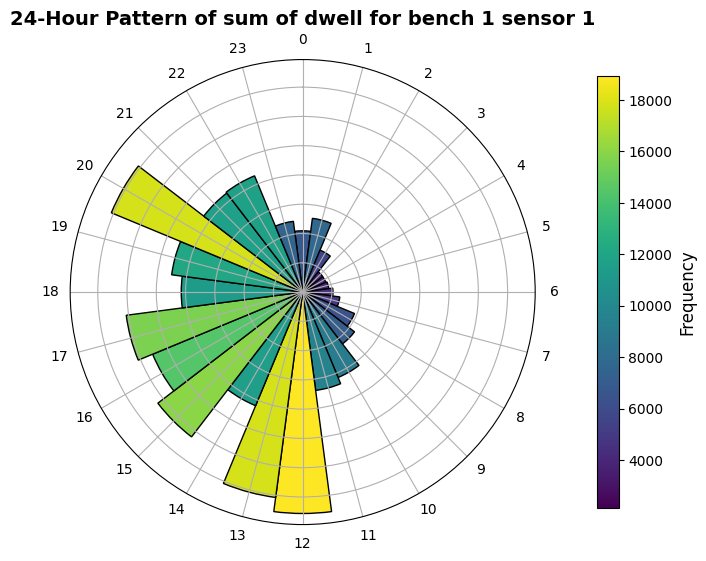

In [109]:
df_s1["hour"] = df_s1["time"].apply(lambda t: t.hour)

hours = df_s1.groupby('hour')['dwell'].sum()
#hours = df_s1.groupby('hour')['dwell'].mean()

angles = np.linspace(0, 2 * np.pi, len(hours), endpoint=False)
widths = np.pi / 12 
colors = plt.cm.viridis(hours.values / hours.values.max())

# Plot settings
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
bars = ax.bar(angles, hours.values, width=widths, color=colors, edgecolor='black')

# Make the chart look like a clock
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

# Add a color bar
sm = plt.cm.ScalarMappable(cmap='viridis',norm=mcolors.Normalize(vmin=hours.values.min(), vmax=hours.values.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.7, pad=0.1)
cbar.set_label('Frequency',fontsize=12)

# Set labels and title
ax.set_xticks(angles)
ax.set_xticklabels(hours.index, fontsize=10)
ax.set_yticklabels([])
ax.set_title('24-Hour Pattern of sum of dwell for bench 1 sensor 1', fontsize=14, fontweight='bold')

# Show plot
plt.show()

As one will notice I only chose to display the histogram for bench 1 sensor 1 and bench 2 sensor 4 on the website but for the exploration of the data I also plotted the histogram for the two other sensors as shown below. 

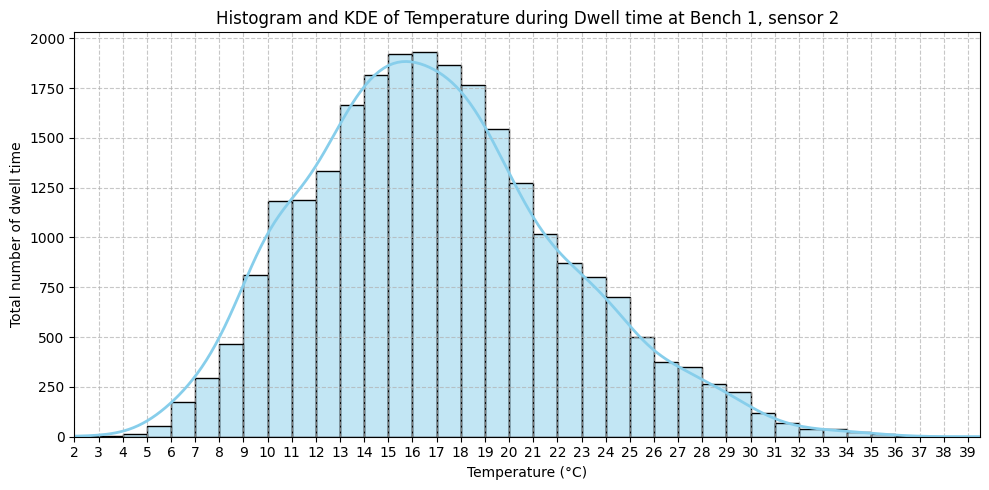

In [110]:
df_plot_s2 = df_s2.dropna(subset=["temp", "dwell"])

# Expand the x-axis a bit for a nicer plot
temp_extended = np.append(df_plot_s2["temp"], df_plot_s2["temp"].max() + 1)
dwell_extended = np.append(df_plot_s2["dwell"], 0)  # Add 0 to match the length

# Plot histogram and KDE
plt.figure(figsize=(10, 5))
sns.histplot(
    temp_extended,
    kde=True,
    bins=np.arange(df_s2["temp"].min(), df_s2["temp"].max() + 2, 1), 
    color="skyblue",
    alpha=0.5,
    #stat="density",
    stat="count",
    kde_kws={'bw_adjust': 1.5, 'cut': 0},   
    line_kws={'color': 'red', 'linewidth': 2}
)

plt.title("Histogram and KDE of Temperature during Dwell time at Bench 1, sensor 2")
plt.xlabel("Temperature (°C)")
plt.ylabel("Total number of dwell time")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(df_s2["temp"].min(), df_s2["temp"].max() + 1)

# x-axis correspond to whole degrees of temperature
plt.xticks(np.arange(int(df_s2["temp"].min()), int(df_s2["temp"].max()) + 2, 1))


plt.tight_layout()
plt.show()

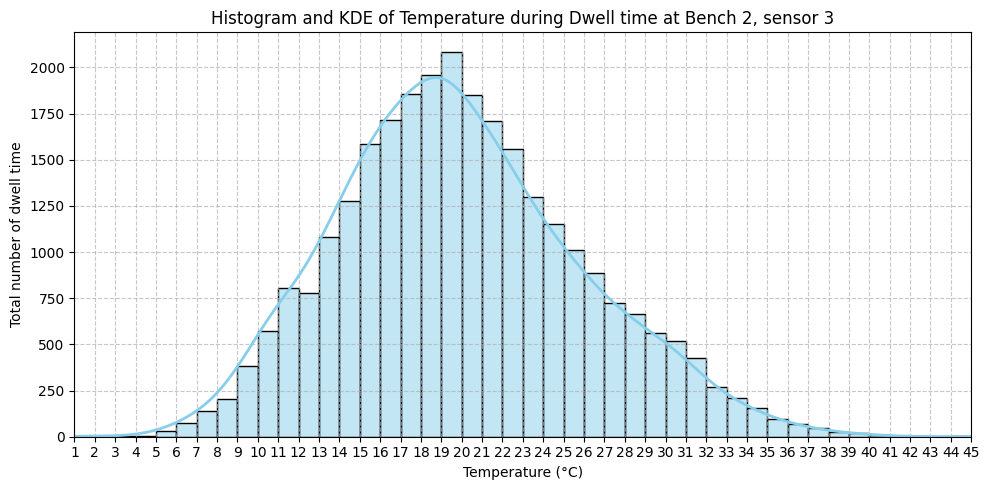

In [111]:
df_plot_s3 = df_s3.dropna(subset=["temp", "dwell"])

# Expand the x-axis a bit for a nicer plot
temp_extended = np.append(df_plot_s3["temp"], df_plot_s3["temp"].max() + 1)
dwell_extended = np.append(df_plot_s3["dwell"], 0)  # Add 0 to match the length

# Plot histogram and KDE
plt.figure(figsize=(10, 5))
sns.histplot(
    temp_extended,
    kde=True,
    bins=np.arange(df_s3["temp"].min(), df_s3["temp"].max() + 2, 1),  
    color="skyblue",
    alpha=0.5,
    #stat="density",
    stat="count",
    kde_kws={'bw_adjust': 1.5, 'cut': 0},     
    line_kws={'color': 'red', 'linewidth': 2}
)

plt.title("Histogram and KDE of Temperature during Dwell time at Bench 2, sensor 3")
plt.xlabel("Temperature (°C)")
plt.ylabel("Total number of dwell time")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(df_s3["temp"].min(), df_s3["temp"].max() + 1)

# x-axis correspond to whole degrees of temperature
plt.xticks(np.arange(int(df_s3["temp"].min()), int(df_s3["temp"].max()) + 2, 1))


plt.tight_layout()
plt.show()

Lastly I saved the cleaned and preprocessed datasets.

In [112]:
benches_df = df
bench_df_s1 = df_s1
bench_df_s2 = df_s2
bench_df_s3 = df_s3
bench_df_s4 = df_s4

''' benches_df.to_csv("benches_df.csv", index=False)
bench_df_s1.to_csv("bench_df_s1.csv", index=False)
bench_df_s2.to_csv("bench_df_s2.csv", index=False)
bench_df_s3.to_csv("bench_df_s3.csv", index=False)
bench_df_s4.to_csv("bench_df_s4.csv", index=False) '''

' benches_df.to_csv("benches_df.csv", index=False)\nbench_df_s1.to_csv("bench_df_s1.csv", index=False)\nbench_df_s2.to_csv("bench_df_s2.csv", index=False)\nbench_df_s3.to_csv("bench_df_s3.csv", index=False)\nbench_df_s4.to_csv("bench_df_s4.csv", index=False) '

### Combined basic stats

Not a lot of data cleaning and exploration of the combined data was needed for the combined data. But a bit of preprocessing was needed to display the correct visitor numbers for the Argyle Square city park map.

In [113]:
import pandas as pd
import folium
import matplotlib.pyplot as plt

# For bokeh plot
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, Legend, LegendItem, Select, CustomJS
from bokeh.palettes import Category10
from bokeh.io import output_file
from bokeh.layouts import column

Import data:

In [114]:
# Specify the full path to the CSV files
file_path_1 = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\visits_df.csv"
file_path_2 = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\visits_df_2022.csv"
file_path_3 = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\visits_df_2023.csv"
file_path_4 = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\visits_df_2024.csv"

file_path_5 = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\benches_df.csv"
file_path_6 = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\bench_df_s1.csv"
file_path_7 = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\bench_df_s2.csv"
file_path_8 = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\bench_df_s3.csv"
file_path_9 = r"C:\Users\Bruger\Documents\s194384.github.io\My final project codes\bench_df_s4.csv"

# Read data from the specified files
visits_df = pd.read_csv(file_path_1)
visits_df_2022 = pd.read_csv(file_path_2)
visits_df_2023 = pd.read_csv(file_path_3)
visits_df_2024 = pd.read_csv(file_path_4)

benches_df = pd.read_csv(file_path_5)
bench_df_s1 = pd.read_csv(file_path_6)
bench_df_s2 = pd.read_csv(file_path_7)
bench_df_s3 = pd.read_csv(file_path_8)
bench_df_s4 = pd.read_csv(file_path_9)

Locations

In [115]:
blixvisit_location = visits_df['Lat Long'].dropna().unique()
blixvisit_location = tuple(map(float, blixvisit_location[0].split(', ')))

bench_location = benches_df['Lat Long'].dropna().unique()
bench_location

array(['-37.8027388, 144.9655868', '-37.8028278, 144.9654266'],
      dtype=object)

In [116]:
bench_location_1 = (-37.8027388, 144.9655868)
bench_location_2 = (-37.8028278, 144.9654266)

Data for Mobile phone counting sensor

In [117]:
visitors_2022 = total_sum = visits_df_2022["total"].sum()
visitors_2023 = total_sum = visits_df_2023["total"].sum()
visitors_2024 = total_sum = visits_df_2024["total"].sum()

data_mobile  = f"""
<b>Visitors</b><br>
2022: {visitors_2022}<br>
2023: {visitors_2023}<br>
2024 (first half of the year): {visitors_2024}
"""

Data for Benches

In [118]:
bench_df_s1['date'] = pd.to_datetime(bench_df_s1['date']) #set date to datetime-format
print(bench_df_s1['date'].dtype) #Check to see if done correctly

bench_df_s2['date'] = pd.to_datetime(bench_df_s2['date']) #set date to datetime-format
print(bench_df_s2['date'].dtype) #Check to see if done correctly

bench_df_s3['date'] = pd.to_datetime(bench_df_s3['date']) #set date to datetime-format
print(bench_df_s3['date'].dtype) #Check to see if done correctly

bench_df_s4['date'] = pd.to_datetime(bench_df_s4['date']) #set date to datetime-format
print(bench_df_s4['date'].dtype) #Check to see if done correctly

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [119]:
#Remember sensor 1 and 2 are on bench 1
# and sensor 2 and 3 are on bench 2

# Bench 1
bench_df_s1_2021 = bench_df_s1[bench_df_s1['date'].dt.year == 2021].copy()
bench_df_s1_2022 = bench_df_s1[bench_df_s1['date'].dt.year == 2022].copy()
bench_df_s1_2023 = bench_df_s1[bench_df_s1['date'].dt.year == 2023].copy()
bench_df_s1_2024 = bench_df_s1[bench_df_s1['date'].dt.year == 2024].copy()

bench_df_s2_2021 = bench_df_s1[bench_df_s2['date'].dt.year == 2021].copy()
bench_df_s2_2022 = bench_df_s1[bench_df_s2['date'].dt.year == 2022].copy()
bench_df_s2_2023 = bench_df_s1[bench_df_s2['date'].dt.year == 2023].copy()
bench_df_s2_2024 = bench_df_s1[bench_df_s2['date'].dt.year == 2024].copy()

bench_1_2021 = bench_df_s1_2021.shape[0] + bench_df_s2_2021.shape[0]
bench_1_2022 = bench_df_s1_2022.shape[0] + bench_df_s2_2022.shape[0]
bench_1_2023 = bench_df_s1_2023.shape[0] + bench_df_s2_2023.shape[0]
bench_1_2024 = bench_df_s1_2022.shape[0] + bench_df_s2_2024.shape[0]

data_bench_1  = f"""
<b>Visitors</b><br>
2021: {bench_1_2021}<br>
2022: {bench_1_2022}<br>
2023: {bench_1_2023}<br>
2024: {bench_1_2024}<br>
"""

C:\Users\Bruger\AppData\Local\Temp\ipykernel_13756\3409072699.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bench_df_s2_2021 = bench_df_s1[bench_df_s2['date'].dt.year == 2021].copy()
C:\Users\Bruger\AppData\Local\Temp\ipykernel_13756\3409072699.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bench_df_s2_2022 = bench_df_s1[bench_df_s2['date'].dt.year == 2022].copy()
C:\Users\Bruger\AppData\Local\Temp\ipykernel_13756\3409072699.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bench_df_s2_2023 = bench_df_s1[bench_df_s2['date'].dt.year == 2023].copy()
C:\Users\Bruger\AppData\Local\Temp\ipykernel_13756\3409072699.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bench_df_s2_2024 = bench_df_s1[bench_df_s2['date'].dt.year == 2024].copy()


In [120]:
# Bench 2
bench_df_s3_2021 = bench_df_s3[bench_df_s3['date'].dt.year == 2021].copy()
bench_df_s3_2022 = bench_df_s3[bench_df_s3['date'].dt.year == 2022].copy()
bench_df_s3_2023 = bench_df_s3[bench_df_s3['date'].dt.year == 2023].copy()
bench_df_s3_2024 = bench_df_s3[bench_df_s3['date'].dt.year == 2024].copy()

bench_df_s4_2021 = bench_df_s4[bench_df_s4['date'].dt.year == 2021].copy()
bench_df_s4_2022 = bench_df_s4[bench_df_s4['date'].dt.year == 2022].copy()
bench_df_s4_2023 = bench_df_s4[bench_df_s4['date'].dt.year == 2023].copy()
bench_df_s4_2024 = bench_df_s4[bench_df_s4['date'].dt.year == 2024].copy()

bench_2_2021 = bench_df_s3_2021.shape[0] + bench_df_s4_2021.shape[0]
bench_2_2022 = bench_df_s3_2022.shape[0] + bench_df_s4_2022.shape[0]
bench_2_2023 = bench_df_s3_2023.shape[0] + bench_df_s4_2023.shape[0]
bench_2_2024 = bench_df_s3_2022.shape[0] + bench_df_s4_2024.shape[0]

data_bench_2  = f"""
<b>Visitors</b><br>
2021: {bench_2_2021}<br>
2022: {bench_2_2022}<br>
2023: {bench_2_2023}<br>
2024: {bench_2_2024}<br>
"""

For the combined bokeh plot I also did a lot of preprocessing. There might have been an easier way to produce this plot but for me I found it easiest to take it step by step. 

First I had a look at the headers to better understand the data.

In [121]:
bench_df_s1_2022.head()

dwell  temp       date      time  hour
6990   6.183333  23.0 2022-01-01  03:48:21     3
6991   2.966667  22.0 2022-01-01  04:48:40     4
6992   3.183333  22.0 2022-01-01  04:55:57     4
6993   7.416667  35.0 2022-01-01  12:20:30    12
6994  11.150000  35.5 2022-01-01  12:30:16    12

In [122]:
visits_df_2022.head()

datetime  venueId  total   dwell  \
0  2022-12-16 21:00:00+11:00     7780    422  107188   
1  2022-12-23 14:00:00+11:00     7780    351  170937   
2  2022-12-23 21:00:00+11:00     7780    504  193032   
3  2022-12-28 03:00:00+11:00     7780     13    2574   
4  2022-12-28 04:00:00+11:00     7780      5    2340   

                   Sensor Name            Sensor Type  \
0  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
1  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
2  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
3  Pedestrian Sensor-Argyle Sq  Mobile phone counting   
4  Pedestrian Sensor-Argyle Sq  Mobile phone counting   

                   Lat Long  avg_dwell  Latitude   Longitude        date  \
0  -37.8025805, 144.9656012        4.0 -37.80258  144.965601  2022-12-16   
1  -37.8025805, 144.9656012        8.0 -37.80258  144.965601  2022-12-23   
2  -37.8025805, 144.9656012        6.0 -37.80258  144.965601  2022-12-23   
3  -37.8025805, 144.9656012        3.0 -37.80258  144.965601  2022-12-28   
4  -37.8025805, 144.9656012        7.0 -37.80258  144.965601  2022-12-28   

       time  hour  
0  21:00:00    21  
1  14:00:00    14  
2  21:00:00    21  
3  03:00:00     3  
4  04:00:00     4

In [123]:
# visits: sum total per day
visits_aggregated_2022 = visits_df_2022.groupby('date')['total'].sum().reset_index()

# bench: count rows per day
bench_aggregated_2022 = bench_df_s1_2022.groupby('date').size().reset_index(name='count')
#bench_aggregated_2022 = bench_df_s1_2022['date'].value_counts().sort_index()

# add days of the week
visits_aggregated_2022['weekday'] = pd.to_datetime(visits_aggregated_2022['date']).dt.day_name()
bench_aggregated_2022['weekday'] = pd.to_datetime(bench_aggregated_2022['date']).dt.day_name()

Then I made a very simple not interactive plot to understand how the two datasets would look plotted together for the year 2022. It looked like there was only one green cross for each day of the week but by investigating and zooming in on the plot many more crosses/data points appeared. 

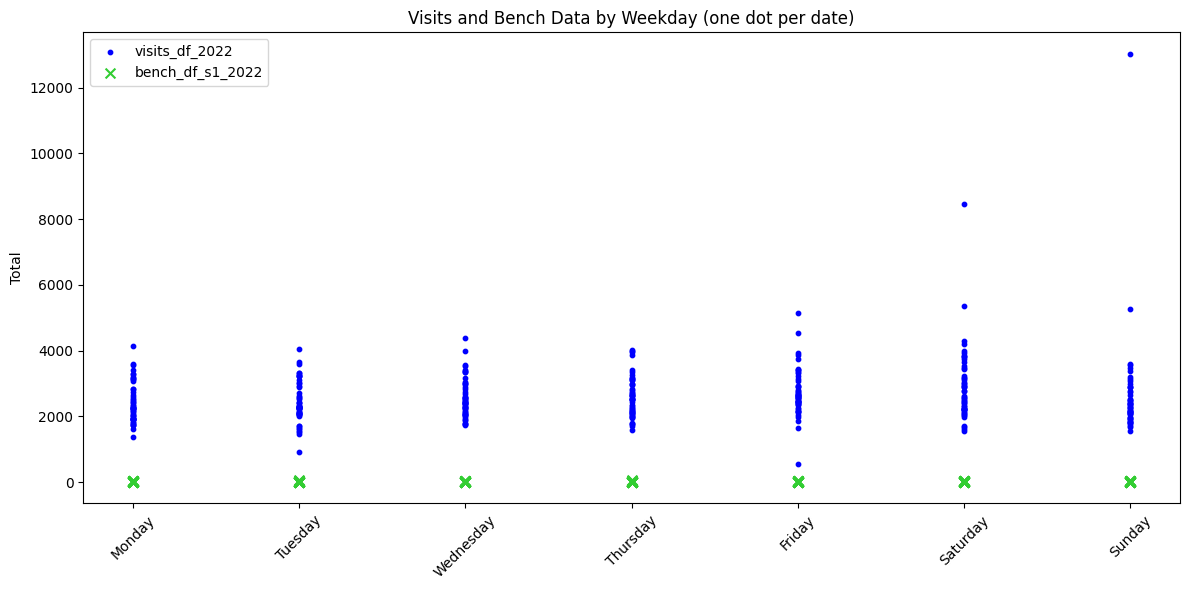

In [124]:
# Map days of the week to numbers for order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_map = {day: i for i, day in enumerate(weekday_order)}
visits_aggregated_2022['weekday_num'] = visits_aggregated_2022['weekday'].map(weekday_map)
bench_aggregated_2022['weekday_num'] = bench_aggregated_2022['weekday'].map(weekday_map)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(visits_aggregated_2022['weekday_num'], visits_aggregated_2022['total'], color='blue', s=10, label='visits_df_2022')
plt.scatter(bench_aggregated_2022['weekday_num'], bench_aggregated_2022['count'], color='limegreen', marker='x', s=50, label='bench_df_s1_2022')

plt.xticks(ticks=range(7), labels=weekday_order, rotation=45)
plt.ylabel('Total')
plt.title('Visits and Bench Data by Weekday (one dot per date)')

#plt.ylim(1, 80) #zoom

plt.legend()
plt.tight_layout()
plt.show()

Then I made the plot into an interactive bokeh plot including a hover, meaning when you hover the mouse over a data point, it would display the date of the data point, the count and what type of data.

In [125]:
visits_src = ColumnDataSource(data={
    'weekday': visits_aggregated_2022['weekday'],
    'value': visits_aggregated_2022['total'],
    'date': visits_aggregated_2022['date'].astype(str),
    'type': ['Visits'] * len(visits_aggregated_2022)
})

bench_src = ColumnDataSource(data={
    'weekday': bench_aggregated_2022['weekday'],
    'value': bench_aggregated_2022['count'],
    'date': bench_aggregated_2022['date'].astype(str),
    'type': ['Bench'] * len(bench_aggregated_2022)
})

# Make figure
p = figure(
    title="Interaktivt plot: Visits og Bench",
    x_range=weekday_order,
    y_axis_label="Total/Count",
    width=900,
    height=400,
    toolbar_location="above"
)

# Draw the data dots
p.circle(x='weekday', y='value', size=6, source=visits_src,
         color=Category10[3][0], legend_label="Visits", alpha=0.6)

p.cross(x='weekday', y='value', size=10, source=bench_src,
        color=Category10[3][1], legend_label="Bench", alpha=0.8)

hover = HoverTool(tooltips=[
    ("Date", "@date"),
    ("Count", "@value"),
    ("Type", "@type")
])
p.add_tools(hover)

# Styling
p.legend.location = "top_left"
p.legend.click_policy = "hide"


show(p)

Then I wanted to divide the bench data so it didn't just show all of the data for both benches but also deferred between the different sensors. 

In [ ]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# ColumnDataSource for visits
visits_src = ColumnDataSource(data={
    'weekday': visits_aggregated_2022['weekday'],
    'value': visits_aggregated_2022['total'],
    'date': visits_aggregated_2022['date'].astype(str),
    'type': ['Visits'] * len(visits_aggregated_2022)
})

# ColumnDataSources for each bench dataset
def make_bench_source(df_bench_2022, name):
    return ColumnDataSource(data={
        'weekday': df_bench_2022['weekday'],
        'value': df_bench_2022['count'],
        'date': df_bench_2022['date'].astype(str),
        'type': [name] * len(df_bench_2022)
    })

for df_bench_2022 in [bench_df_s1_2022, bench_df_s2_2022, bench_df_s3_2022, bench_df_s4_2022]:
    df_bench_2022['weekday'] = pd.to_datetime(df_bench_2022['date']).dt.day_name()


def aggregate_bench(df_bench_2022):
    df_bench_2022['date'] = pd.to_datetime(df_bench_2022['date'])
    df_bench_2022['weekday'] = df_bench_2022['date'].dt.day_name()
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df_bench_2022['weekday_num'] = df_bench_2022['weekday'].map({day: i for i, day in enumerate(weekday_order)})
    
    # Count rows per date
    agg = df_bench_2022.groupby('date').size().reset_index(name='count')
    
    # Add weekday again after aggregation
    agg['weekday'] = agg['date'].dt.day_name()
    return agg

bench_df_s1_agg = aggregate_bench(bench_df_s1_2022)
bench_df_s2_agg = aggregate_bench(bench_df_s2_2022)
bench_df_s3_agg = aggregate_bench(bench_df_s3_2022)
bench_df_s4_agg = aggregate_bench(bench_df_s4_2022)


bench_sources = {
    'Bench S1': make_bench_source(bench_df_s1_agg, 'Bench S1'),
    'Bench S2': make_bench_source(bench_df_s2_agg, 'Bench S2'),
    'Bench S3': make_bench_source(bench_df_s3_agg, 'Bench S3'),
    'Bench S4': make_bench_source(bench_df_s4_agg, 'Bench S4'),
}


# Make figure
p = figure(
    title="Interactive plot: Visits and Bench (S1–S4) for 2022",
    x_range=weekday_order,
    y_axis_label="Total",
    width=900,
    height=400,
    toolbar_location="above"
)

# Always show visits
visits_renderer = p.circle(x='weekday', y='value', size=6, source=visits_src,
                           color=Category10[3][0], alpha=0.6)


# Bench plots
colors = Category10[4]
sensor_groups = {
    'Bench S1': 'Bench 1',
    'Bench S2': 'Bench 1',
    'Bench S3': 'Bench 2',
    'Bench S4': 'Bench 2',
}

legend_items = [LegendItem(label="Visitors", renderers=[visits_renderer])]
added_groups = set()


for i, (label, source) in enumerate(bench_sources.items()):
    color = colors[i]
    group = sensor_groups[label]

    cross = p.cross(x='weekday', y='value', size=10, source=source,
                    color=color, alpha=0.6, muted_alpha=0.1)

    # Add title as empty LegendItem (once per group)
    if group not in added_groups:
        legend_items.append(LegendItem(label=group, renderers=[]))
        added_groups.add(group)

    # Add the sensor under the group
    clean_label = label.replace("Bench S", "s")
    legend_items.append(LegendItem(label=clean_label, renderers=[cross]))

# Add the grouped legend
legend = Legend(items=legend_items, location="top_left", click_policy="mute", label_text_font_size="10pt")
p.add_layout(legend)



hover = HoverTool(tooltips=[
    ("Date", "@date"),
    ("Count", "@value"),
    ("Type", "@type")
])
p.add_tools(hover)

# Styling
p.legend.location = "top_left"
p.legend.click_policy = "mute"

# Save in browser
show(p)

All of this is only for the year 2022. I also have the data for 2023. Then I plottet the bokeh plot for 2023.

In [127]:
# visits: total total per day
visits_aggregated_2023 = visits_df_2023.groupby('date')['total'].sum().reset_index()

# add days of the week
visits_aggregated_2023['weekday'] = pd.to_datetime(visits_aggregated_2023['date']).dt.day_name()

In [ ]:
# ColumnDataSource for visits
visits_src = ColumnDataSource(data={
    'weekday': visits_aggregated_2023['weekday'],
    'value': visits_aggregated_2023['total'],
    'date': visits_aggregated_2023['date'].astype(str),
    'type': ['Visits'] * len(visits_aggregated_2023)
})

# ColumnDataSources for each bench dataset
def make_bench_source(df_bench_2023, name):
    return ColumnDataSource(data={
        'weekday': df_bench_2023['weekday'],
        'value': df_bench_2023['count'],
        'date': df_bench_2023['date'].astype(str),
        'type': [name] * len(df_bench_2023)
    })

for df_bench_2023 in [bench_df_s1_2023, bench_df_s2_2023, bench_df_s3_2023, bench_df_s4_2023]:
    df_bench_2023['weekday'] = pd.to_datetime(df_bench_2023['date']).dt.day_name()



def aggregate_bench(df_bench_2023):
    df_bench_2023['date'] = pd.to_datetime(df_bench_2023['date'])  
    df_bench_2023['weekday'] = df_bench_2023['date'].dt.day_name()
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df_bench_2023['weekday_num'] = df_bench_2023['weekday'].map({day: i for i, day in enumerate(weekday_order)})
    
    # Count rows per date
    agg_2023 = df_bench_2023.groupby('date').size().reset_index(name='count')
    
    # Add weekday again after aggregation
    agg_2023['weekday'] = agg_2023['date'].dt.day_name()
    return agg_2023

bench_df_s1_agg_2023 = aggregate_bench(bench_df_s1_2023)
bench_df_s2_agg_2023 = aggregate_bench(bench_df_s2_2023)
bench_df_s3_agg_2023 = aggregate_bench(bench_df_s3_2023)
bench_df_s4_agg_2023 = aggregate_bench(bench_df_s4_2023)


bench_sources = {
    'Bench S1': make_bench_source(bench_df_s1_agg_2023, 'Bench S1'),
    'Bench S2': make_bench_source(bench_df_s2_agg_2023, 'Bench S2'),
    'Bench S3': make_bench_source(bench_df_s3_agg_2023, 'Bench S3'),
    'Bench S4': make_bench_source(bench_df_s4_agg_2023, 'Bench S4'),
}


# Make figure
p = figure(
    title="Interactive plot: Visits and Bench (S1–S4) for 2023",
    x_range=weekday_order,
    y_axis_label="Total",
    width=900,
    height=400,
    toolbar_location="above"
)

# Always show visitors
visits_renderer = p.circle(x='weekday', y='value', size=6, source=visits_src,
                           color=Category10[3][0], alpha=0.6)


# Bench plots
colors = Category10[4]
sensor_groups = {
    'Bench S1': 'Bench 1',
    'Bench S2': 'Bench 1',
    'Bench S3': 'Bench 2',
    'Bench S4': 'Bench 2',
}

legend_items = [LegendItem(label="Visitors", renderers=[visits_renderer])]
added_groups = set()


for i, (label, source) in enumerate(bench_sources.items()):
    color = colors[i]
    group = sensor_groups[label]

    cross = p.cross(x='weekday', y='value', size=10, source=source,
                    color=color, alpha=0.6, muted_alpha=0.1)

    # Add title as empty LegendItem (once per group)
    if group not in added_groups:
        legend_items.append(LegendItem(label=group, renderers=[]))
        added_groups.add(group)

    # Add the sensor under the group
    clean_label = label.replace("Bench S", "s")
    legend_items.append(LegendItem(label=clean_label, renderers=[cross]))

# Add the grouped legend
legend = Legend(items=legend_items, location="top_left", click_policy="mute", label_text_font_size="10pt")
p.add_layout(legend)


hover = HoverTool(tooltips=[
    ("Date", "@date"),
    ("Count", "@value"),
    ("Type", "@type")
])
p.add_tools(hover)

# Styling
p.legend.location = "top_left"
p.legend.click_policy = "mute"  

# Show in browser
show(p)

The last step was to combine the two bokeh plots and adding a dropdown menu for selecting between the two different years.

# Data Analysis

As shown in the **Basic stats** I did most of the data analysis visually through plotting different kind of plots. This really helped me a lot in learning about the dataset. For the blix-visits dataset I learned there was a big difference in dwell and avg_dwell. Dwell is the total dwell time for all registred visitors at the park (accumulated value). It was a bit difficult to figure out what the unit of dwell was. But when looking at the avg_dwell, which I found out is the average length of stay per person, it was calculated by avg_dwell = dwell / total / 60. Then it would make most sense if dwell had the unit seconds and avg_dwell had the unit minutes. If the dwell was in minutes then the avg_dwell would be in hours meaning individuals would stay at the park for 7 hours beginning at 4 am, which would not make sense at all.

An obvious observation when analysing the blix-visits dataset was that it contained more tracking sensors around Melbourne and not just for the park. Furthermore, I found it extremely interesting to find out that it is during the night that the avg_dwell is at its highest. To analyse that conclusion I made further plots, as described in the **Basic stats** sections. E.g. I tried to figure out if the reason for the longer stays at the park would vary over the seasons of the year. I analysed that by making the line chart plots which is also explained in the **Basic stats** section. It was not the case and my analysis went to the internet where I found out about the crime that had been and was still going on in the area. 

I also analysed if the benches were used as much as there were visits. I found out there were more visitors than usage of benches. It was very interesting to analyse the combination of the two datasets with the bokeh plot. To support the high numbers of visitors on certain dates I researched on the internet. I tried researching a lot on the internet to find explanations for the other outliers of high visitor number for 2023. I only found small events that were also taking place at other dates. I even looked into how the weather was on those days but it was not out of the ordinary either. 

The data analysis for the benches dataset was very interesting and can be read about on the website. I didn't do too much further analysis. I did plot the histograms with the temperature for all sensors and learned eventhough bench 2 is slightly more favorable from 3 pm to 8 pm, bench 1 is used the most. Both histograms for both sensors at bench 1 show normal distribution (slightly right-skewed) around 17°C and 16°C and with peaks above 1750 which is the total number of dwell time. For bench 2 both histograms are also normal distributed (slightly right-skewed) but around 19°C. However sensor 3 has a peak above 2000 and for the other histogram (for sensor 4) it is just exceeding 1600 of total number of dwell time. I don't trust the histogram for sensor 3 as much since I found out it has some non-explainable outburst. However the outburst seen from sensor 3 at 5 pm could be explained by the out burst at about 19-20°C but since none of the other datasets can support the explanation (remember there was also a strange outburst for sensor 2) I doubt the temperature has anything to do with the outburst of sensor 3.

# Genre

The magazine style was chosen for the website. This way the reader is guided through the story which is being told from start to finish. A consistent visual platform was therefore used for the visual structure to emphasize the guidance for the reader. 

A close-up and zooming were used as tools for highlighting. The close-up was used on figure 4 for visual narrative so the reader more clearly could notice a difference in visitors across the days of the week.

Transition guidance wasn’t really used for this data story telling which is quite common for the magazine style genre. 

A linear ordering was used for the narrative structure which again corresponds to the guidance of the reader. 

For interactivity hover highlighting/details and filtering/selection along with explicit instructions were tools used to engage in the story of the data.

Furthermore, captions/headlines, introductory text and summary were used to give the message across to the reader. Especially an introduction was used to start the reader off and then a summary at the finish to sum up everything the reader had learned along the way. It corresponds well with the guidance of the reader.

# Visualizations

For the below code I have commented out where it saves the plots because the plots are already being saved in the main code which is as explained earlier located [My final project codes](https://github.com/s194384/s194384.github.io/tree/main/My%20final%20project%20codes).

### Blix-visits

There were a few plots to choose from when wanting to show that the avg_dwell time is longest during the night. I chose the following box plot because it showed more information than the polar plot and the polar plot doesn't show outliers. The line chart plot was too confusing for the reader and since the seasons of the year didn't matter for the avg_dwell time, it was not relevant for the story to choose this plot. The idea of the plot was to display avg_dwell for the time of day.

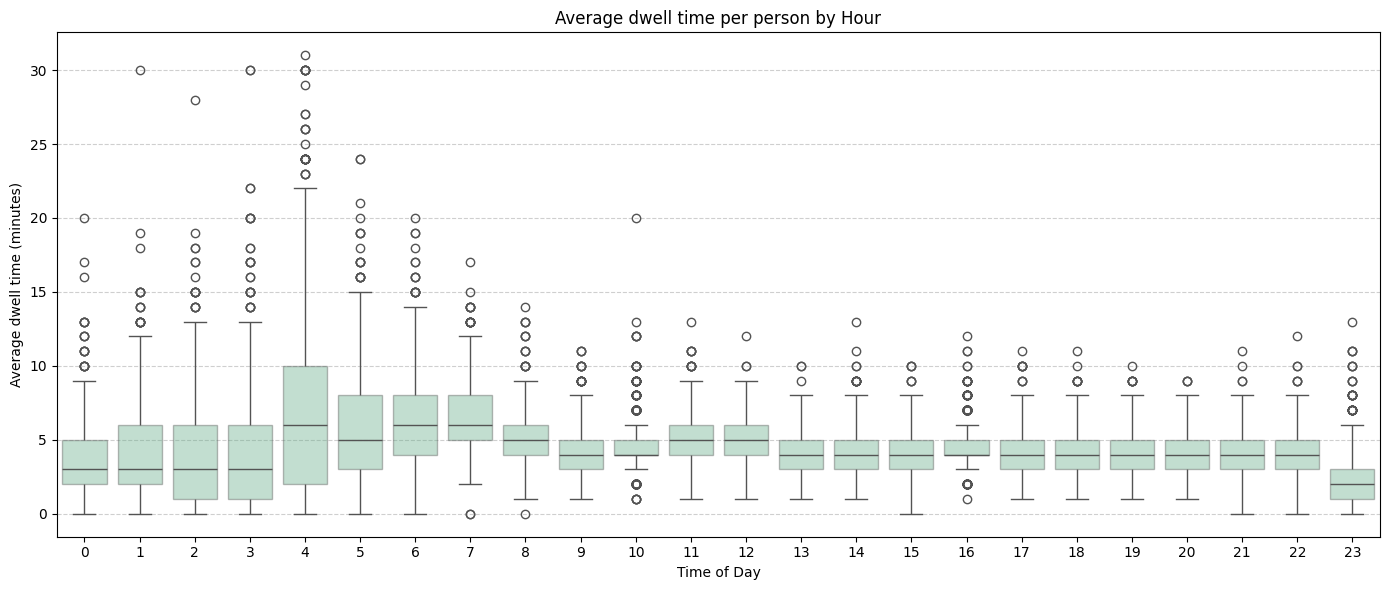

In [129]:
# Box plot
plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=df_park, x='hour', y='avg_dwell', color=(93/255, 184/255, 139/255))

# Make the boxes transparent
for patch in ax.patches:
    patch.set_alpha(0.4)

plt.title('Average dwell time per person by Hour')
plt.xlabel('Time of Day')
plt.ylabel('Average dwell time (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save plot as image
#plt.savefig("visits_avg_dwell_box.png", dpi=300, bbox_inches="tight")

plt.show()

For the story I wanted to investigate at what times where the busiest for the park, and if people actually use it or just pass by to go somewhere else. Therefore I chose the following polar plots. If the plot showed outburst during the times of rush hour it could indicate that people just used the park for passing through to work. 

I like when displaying time of day plots to use the polar plot because you can kinda display it as an analog clock. When comparing the dwell time and number of visitors polar plots, since they are the same plots, one can figure out if people actually stay at the park or just pass through it. Even though the units aren't the same, the plots are produced in a way that there would be different scales of heights in the plots if there were heigh differences in visitors and dwell time. These two plots are also produced from the same dataset.

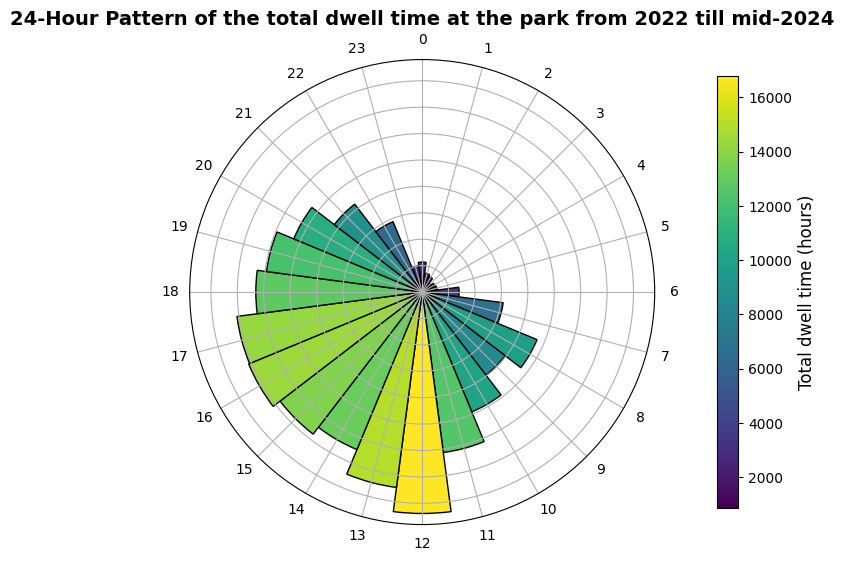

In [130]:
hours = df_park.groupby('hour')['dwell'].sum()/3600


angles = np.linspace(0, 2 * np.pi, len(hours), endpoint=False)
widths = np.pi / 12 
colors = plt.cm.viridis(hours.values / hours.values.max())

# Plot settings
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
bars = ax.bar(angles, hours.values, width=widths, color=colors, edgecolor='black')

# Make the chart look like a clock
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

# Add a color bar
sm = plt.cm.ScalarMappable(cmap='viridis',norm=mcolors.Normalize(vmin=hours.values.min(), vmax=hours.values.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.7, pad=0.1)
cbar.set_label('Total dwell time (hours)',fontsize=12)

# Set labels and title
ax.set_xticks(angles)
ax.set_xticklabels(hours.index, fontsize=10)
ax.set_yticklabels([])
ax.set_title('24-Hour Pattern of the total dwell time at the park from 2022 till mid-2024', fontsize=14, fontweight='bold')

# Save plot as image
#plt.savefig("visits_sum_dwell_polar.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()

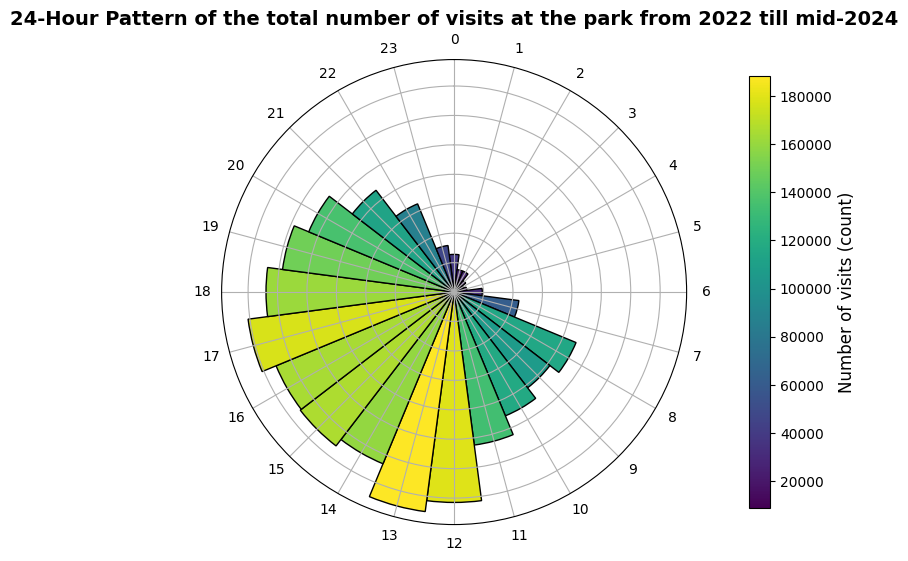

In [131]:
hours = df_park.groupby('hour')['total'].sum()
#hours = df_park.groupby('hour')['avg_dwell'].mean()


angles = np.linspace(0, 2 * np.pi, len(hours), endpoint=False)
widths = np.pi / 12 
colors = plt.cm.viridis(hours.values / hours.values.max())

# Plot settings
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
bars = ax.bar(angles, hours.values, width=widths, color=colors, edgecolor='black')

# Make the chart look like a clock
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

# Add a color bar
sm = plt.cm.ScalarMappable(cmap='viridis',norm=mcolors.Normalize(vmin=hours.values.min(), vmax=hours.values.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.7, pad=0.1)
cbar.set_label('Number of visits (count)',fontsize=12)

# Set labels and title
ax.set_xticks(angles)
ax.set_xticklabels(hours.index, fontsize=10)
ax.set_yticklabels([])
ax.set_title('24-Hour Pattern of the total number of visits at the park from 2022 till mid-2024', fontsize=14, fontweight='bold')

# Save plot as image
#plt.savefig("visits_sum_total_polar.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()

A bar chart for displaying the total number of visitors during the week seemed like the most simple way of displayment. It doesn't show a lot of other non-interesting information for the story. I wanted to tell the story about passing through to go to work or if the visitors also stay at the park. This plot would very clearly show if people just used the park for passing through because then one would expect to see many more visitors at weekdays than in the weekend.

C:\Users\Bruger\AppData\Local\Temp\ipykernel_13756\3637766744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_park['weekday'] = df_park['datetime'].dt.day_name()
C:\Users\Bruger\AppData\Local\Temp\ipykernel_13756\3637766744.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


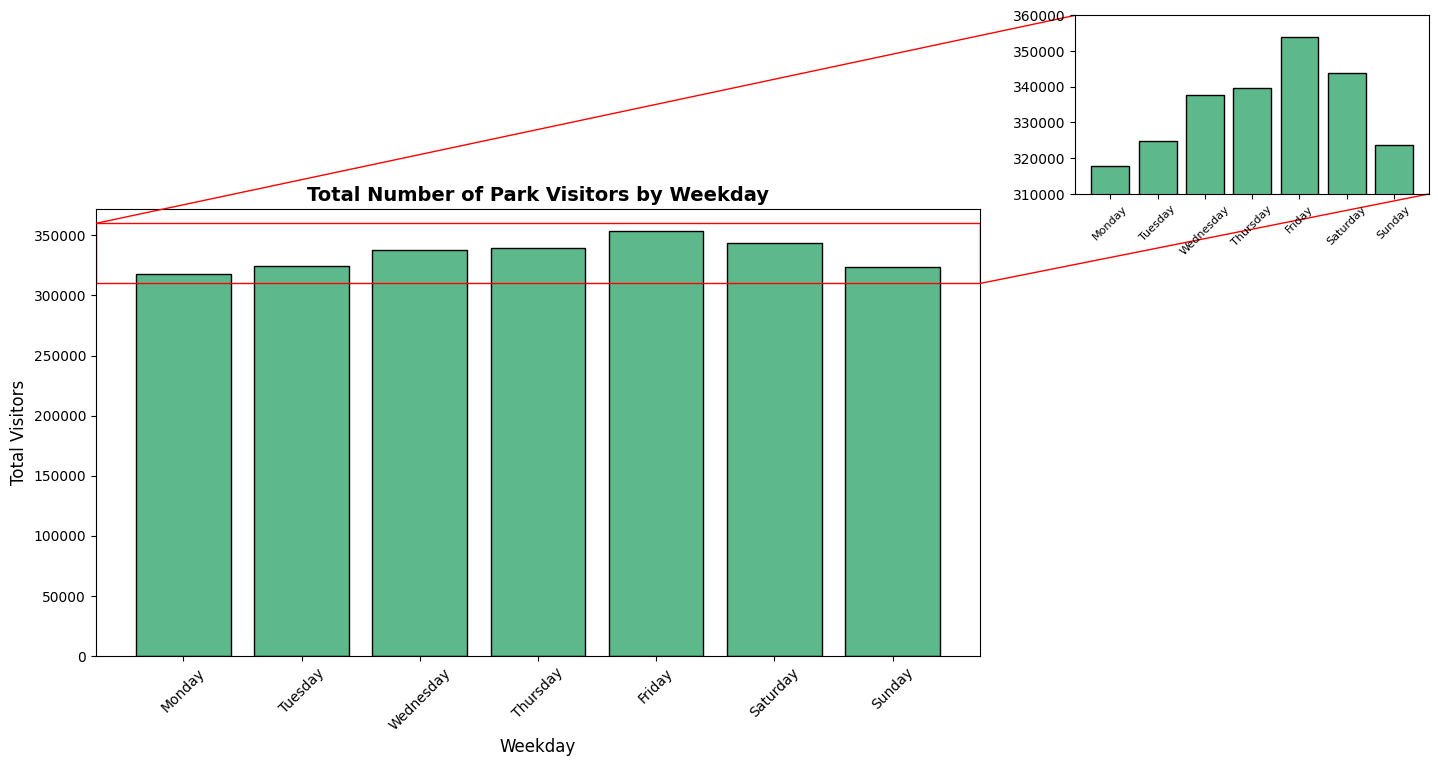

In [132]:
df_park['weekday'] = df_park['datetime'].dt.day_name()
weekday_totals = df_park.groupby('weekday')['total'].sum()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_totals = weekday_totals.reindex(ordered_days)

# Mainplot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(weekday_totals.index, weekday_totals.values, color=(93/255, 184/255, 139/255), edgecolor='black')
ax.set_xlabel('Weekday', fontsize=12)
ax.set_ylabel('Total Visitors', fontsize=12)
ax.set_title('Total Number of Park Visitors by Weekday', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)

# Insert a zoom-in plot (inset)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

axins = inset_axes(ax, width="40%", height="40%", 
                   bbox_to_anchor=(1.10, 0.45, 1, 1), 
                   bbox_transform=ax.transAxes, loc='upper left')

axins.bar(weekday_totals.index, weekday_totals.values, color=(93/255, 184/255, 139/255), edgecolor='black')

# Zoom-in range
axins.set_ylim(310000, 360000)
axins.tick_params(axis='x', rotation=45)
axins.set_xticks(range(len(weekday_totals.index)))
axins.set_xticklabels(weekday_totals.index, rotation=45, fontsize=8)


# Mark correlation between plot and inset
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="red")

# Save plot as image
#plt.savefig("visits_weekdays_bar_chart.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


### Benches

To investigate the usage of the benches I chose the interactive bokeh plot. For the story I still wanted to keep invetigating how much people actually use the park. If people were using/staying at the park bench usage would be high as well. I chose to plot it as a line chart plot with sum of dwell time for benches and time of day because then one could compare the results with the polar plots as well.

In [133]:
df_s1["hour"] = df_s1["time"].apply(lambda t: t.hour)
df_s2["hour"] = df_s2["time"].apply(lambda t: t.hour)
df_s3["hour"] = df_s3["time"].apply(lambda t: t.hour)
df_s4["hour"] = df_s4["time"].apply(lambda t: t.hour)

def prepare_sensor_data(df, label):
    grouped = df.groupby("hour")["dwell"].sum()
    return grouped.sort_index().rename(label)

data = pd.concat([
    prepare_sensor_data(df_s1, "s1"),
    prepare_sensor_data(df_s2, "s2"),
    prepare_sensor_data(df_s3, "s3"),
    prepare_sensor_data(df_s4, "s4")
], axis=1).fillna(0)

# Bokeh source setup
source_data = {"hour": list(range(24))}
for sensor in data.columns:
    source_data[sensor] = data[sensor].values
source = ColumnDataSource(data=source_data)

# Make figure
p = figure(
    title="Dwell Time per Hour – All Sensors",
    x_axis_label="Time of Day",
    y_axis_label="Sum of Dwell Time",
    x_range=(0, 23),
    width=900,
    height=400,
    toolbar_location=None
)

colors = Category10[4]
sensor_labels = ["s1", "s2", "s3", "s4"]
sensor_groups = ["Bench 1", "Bench 1", "Bench 2", "Bench 2"]
legend_items = []

# Draw lines and save legend items
for i, sensor in enumerate(sensor_labels):
    line = p.line(x='hour', y=sensor, source=source,
                  line_width=2, color=colors[i],
                  muted_alpha=0.1, muted=True)
    circle = p.circle(x='hour', y=sensor, source=source,
                      size=5, color=colors[i],
                      muted_alpha=0.1, muted=True)
    legend_items.append((sensor_groups[i], sensor, [line, circle]))

# Groupped legend
legend = Legend(items=[], click_policy="mute", label_text_font_size="10pt")

# Find unique groups and add them as headings
added_groups = set()
for group, label, renderers in legend_items:
    if group not in added_groups:
        legend.items.append(LegendItem(label=group, renderers=[]))
        added_groups.add(group)
    legend.items.append(LegendItem(label=label, renderers=renderers))

# Add legend outside the plot
p.add_layout(legend, 'right')
p.xaxis.ticker = list(range(0, 24))

# Save and show in browser
#output_file("Bokeh_plot_benches.html", title="Bokeh plot for benches")
show(p)

The story also investigates human behavior at a park. People are generally very affected by the weather. Therefore I wanted to see the human behavior for temperature and usage of benches for the temperatures. Also for the story the reader has just found out there is a slight favor towards  bench 2 during the afternoon. There could be many explanations for it where one of them could be because there are different temperatures at the benches.

The histogram was chosen to tell something about the distribution as well. To tell the story about the difference in the two benches I only chose to display the histogram for one sensor for each of the two benches. I chose sensor 1 and sensor 4 because they didn't show any weird outbursts. The outbursts could be errors in the dataset and by not displaying them, the data would be more valid.

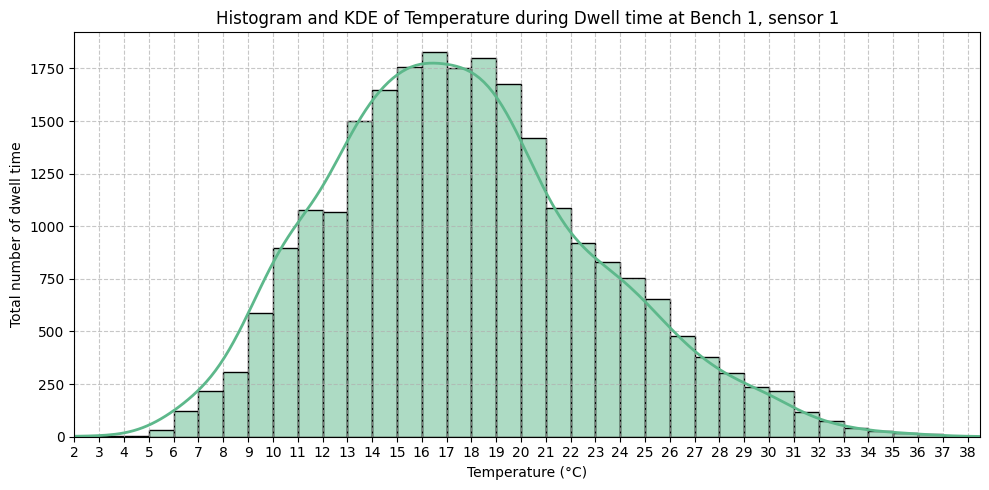

In [134]:
df_plot_s1 = df_s1.dropna(subset=["temp", "dwell"])

# Expand the x-axis a bit for a nicer plot
temp_extended = np.append(df_plot_s1["temp"], df_plot_s1["temp"].max() + 1)
dwell_extended = np.append(df_plot_s1["dwell"], 0)  # Add 0 to match the length

# Plot histogram and KDE
plt.figure(figsize=(10, 5))
sns.histplot(
    temp_extended,
    kde=True,
    bins=np.arange(df_s1["temp"].min(), df_s1["temp"].max() + 2, 1), 
    color=(93/255, 184/255, 139/255),
    alpha=0.5,
    #stat="density",
    stat="count",
    kde_kws={'bw_adjust': 1.5, 'cut': 0},    
    line_kws={'color': 'red', 'linewidth': 2}
)

#plt.title("Histogram og KDE af Temperatur ved Ophold på Bænk 1 sensor 1")
plt.title("Histogram and KDE of Temperature during Dwell time at Bench 1, sensor 1")
plt.xlabel("Temperature (°C)")
plt.ylabel("Total number of dwell time")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(df_s1["temp"].min(), df_s1["temp"].max() + 1)

# x-axis correspond to whole degrees of temperature
plt.xticks(np.arange(int(df_s1["temp"].min()), int(df_s1["temp"].max()) + 2, 1))

plt.tight_layout()

# Save plot as image
#plt.savefig("bench_sensor1_histogram.png", dpi=300, bbox_inches="tight")

plt.show()

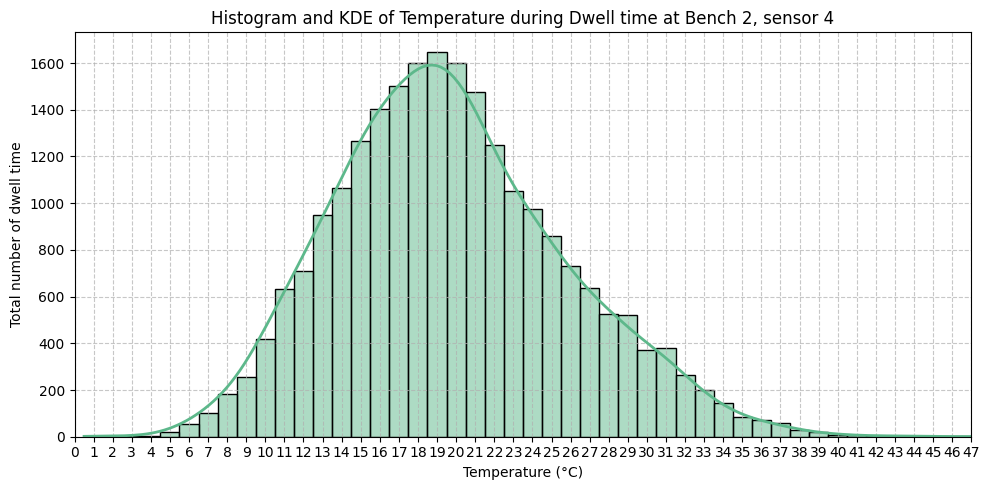

In [135]:
df_plot_s4 = df_s4.dropna(subset=["temp", "dwell"])

# Expand the x-axis a bit for a nicer plot
temp_extended = np.append(df_plot_s4["temp"], df_plot_s4["temp"].max() + 1)
dwell_extended = np.append(df_plot_s4["dwell"], 0)  # Add 0 to match the length

# Plot histogram and KDE
plt.figure(figsize=(10, 5))
sns.histplot(
    temp_extended,
    kde=True,
    bins=np.arange(df_s4["temp"].min(), df_s4["temp"].max() + 2, 1), 
    color=(93/255, 184/255, 139/255),
    alpha=0.5,
    #stat="density",
    stat="count",
    kde_kws={'bw_adjust': 1.5, 'cut': 0},    
    line_kws={'color': 'red', 'linewidth': 2}
)

plt.title("Histogram and KDE of Temperature during Dwell time at Bench 2, sensor 4")
plt.xlabel("Temperature (°C)")
plt.ylabel("Total number of dwell time")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(df_s4["temp"].min(), df_s4["temp"].max() + 1)

# x-axis correspond to whole degrees of temperature
plt.xticks(np.arange(int(df_s4["temp"].min()), int(df_s4["temp"].max()) + 2, 1))

plt.tight_layout()

# Save plot as image
#plt.savefig("bench_sensor4_histogram.png", dpi=300, bbox_inches="tight")

plt.show()

### Combined 

I wanted the reader to know where the benches and sensor were located in the park. Therfore I plotted a map, and when making it interactive I could implement a nice introduction to the expansion of the datasets as well.

In [ ]:
# Start map
map_center = blixvisit_location
m = folium.Map(location=map_center, zoom_start=18)

# Add range from mobile sensor
folium.Circle(
    location=blixvisit_location,
    radius=30,  # radius in meters
    color='blue',
    opacity=0.3,  # lower value = more transparent line
    fill=True,
    fill_color='blue',
    fill_opacity=0.2,
    tooltip="Range of 30 m for the mobile phone counting sensor",  # shows when hover
).add_to(m)

# Add markers
folium.Marker(
    location=blixvisit_location,
    popup=folium.Popup(data_mobile, max_width=300),  # shows when clicked
    tooltip="Mobile phone counting sensor",  # shows when hover
    icon=folium.Icon(color="blue", icon="cloud") 
).add_to(m)

folium.Marker(
    location= bench_location_1,
    popup=folium.Popup(data_bench_1, max_width=300),  # shows when clicked
    tooltip="Bench 1",  # shows when hover
    icon=folium.Icon(color="purple", icon="certificate")  
).add_to(m)

folium.Marker(
    location= bench_location_2,
    popup=folium.Popup(data_bench_2, max_width=300),  # shows when clicked
    tooltip="Bench 2",  # shows when hover
    icon=folium.Icon(color="purple", icon="certificate")  
).add_to(m)
    

# Show map (in Jupyter Notebook)
m

# Save and show in webbrowser
#m.save("city park map.html")
import webbrowser
webbrowser.open("city park map.html")

I chose a bokeh interactive plot to display the two datasets combined because then the reader had the best chance of investigation. This plot has a lot of information. Also, the visitor (blix-visits) data had very high numbers compared to the bench usage dataset. Therefore a zoom tool was necessary to truly explore. Furthermore, it is easy to tell the difference in the count between 2022 and 2023 when flipping between them.

In [136]:
# Visits Combined
visits_aggregated_2022['year'] = "2022"
visits_aggregated_2023['year'] = "2023"
visits_combined = pd.concat([visits_aggregated_2022, visits_aggregated_2023])
visits_combined['weekday'] = pd.to_datetime(visits_combined['date']).dt.day_name()
visits_combined['type'] = "Visits"
visits_combined.rename(columns={'total': 'value'}, inplace=True)

visits_source_all = ColumnDataSource(visits_combined)
visits_source_view = ColumnDataSource(visits_combined[visits_combined['year'] == '2022'])

# Bench Combined
def combine_bench(agg_2022, agg_2023, label):
    df_2022 = agg_2022.copy()
    df_2023 = agg_2023.copy()
    df_2022['year'] = '2022'
    df_2023['year'] = '2023'
    df_all = pd.concat([df_2022, df_2023])
    df_all['type'] = label
    df_all['weekday'] = pd.to_datetime(df_all['date']).dt.day_name()
    df_all.rename(columns={'count': 'value'}, inplace=True)
    return df_all

bench_dataframes = {
    'Bench S1': combine_bench(bench_df_s1_agg, bench_df_s1_agg_2023, 'Bench S1'),
    'Bench S2': combine_bench(bench_df_s2_agg, bench_df_s2_agg_2023, 'Bench S2'),
    'Bench S3': combine_bench(bench_df_s3_agg, bench_df_s3_agg_2023, 'Bench S3'),
    'Bench S4': combine_bench(bench_df_s4_agg, bench_df_s4_agg_2023, 'Bench S4'),
}

bench_sources_all = {label: ColumnDataSource(df) for label, df in bench_dataframes.items()}
bench_views = {label: ColumnDataSource(df[df['year'] == '2022']) for label, df in bench_dataframes.items()}

# Calculate max value for y-axis
max_visits = visits_combined['value'].max()
max_bench = max([df['value'].max() for df in bench_dataframes.values()])
y_max = max(max_visits, max_bench) * 1.1

# Make figure
p = figure(
    title="Interactive plot: Visits and Bench (sensor 1 – sensor 4) for 2022 and 2023",
    x_range=weekday_order,
    y_range=(-1000, y_max),
    y_axis_label="Total",
    width=900,
    height=400,
    toolbar_location="above"
)

# Visits
visits_renderer = p.circle(
    x='weekday', y='value', size=6, source=visits_source_view,
    color=Category10[3][0], alpha=0.6
)

# Bench
colors = Category10[4]
sensor_groups = {
    'Bench S1': 'Bench 1',
    'Bench S2': 'Bench 1',
    'Bench S3': 'Bench 2',
    'Bench S4': 'Bench 2',
}
legend_items = [LegendItem(label="Visitors", renderers=[visits_renderer])]
added_groups = set()

for i, (label, source) in enumerate(bench_views.items()):
    color = colors[i]
    group = sensor_groups[label]
    glyph = p.cross(x='weekday', y='value', size=10, source=source, color=color, alpha=0.6, muted_alpha=0.1)

    if group not in added_groups:
        legend_items.append(LegendItem(label=group, renderers=[]))
        added_groups.add(group)
    legend_items.append(LegendItem(label=label.replace("Bench S", "s"), renderers=[glyph]))

legend = Legend(items=legend_items, location="top_left", click_policy="mute", label_text_font_size="10pt")
p.add_layout(legend)

# Hover
hover = HoverTool(tooltips=[
    ("Date", "@date{%F}"),
    ("Count", "@value"),
    ("Type", "@type")
], formatters={"@date": "datetime"})
p.add_tools(hover)

# Dropdown
year_select = Select(title="Select year:", value="2022", options=["2022", "2023"])

# JS Callback
callback_code = """
const year = cb_obj.value;

function update_view(source_all, source_view) {
    const all_data = source_all.data;
    const new_data = {};
    for (const key in all_data) new_data[key] = [];

    for (let i = 0; i < all_data['year'].length; i++) {
        if (all_data['year'][i] === year) {
            for (const key in all_data) {
                new_data[key].push(all_data[key][i]);
            }
        }
    }
    source_view.data = new_data;
    source_view.change.emit();
}

update_view(visits_source_all, visits_source_view);

for (const key in bench_sources_all) {
    update_view(bench_sources_all[key], bench_views[key]);
}
"""

callback = CustomJS(
    args=dict(
        visits_source_all=visits_source_all,
        visits_source_view=visits_source_view,
        bench_sources_all=bench_sources_all,
        bench_views=bench_views
    ),
    code=callback_code
)
year_select.js_on_change('value', callback)


# Save and show in browser
#output_file("Bokeh plot with combined data for 2022 and 2023.html", title="Bokeh plot with combined data for 2022 and 2023")
show(column(year_select, p))

# Discussion

I probably could have investigated more into the high avg_dwell time during the nights. It could have been interesting to have made more plots showing the usage of the benches during the night compared with the avg_dwell time. If there were long stays on the two benches at night as well, then the explanation for the high avg_dwell time during the night could also be explained by homeless people using/sleeping on the benches. However, this would have to be researched further with support from other sources, and the homeless would have to own a wifi-device.

For figure 6 on the website, two strange outbursts from sensor 2 and sensor 3 is shown. The explanation for those are missing. Further investigations would be needed. 

Overall I think this project went well. I am especially very happy with the interactive plots (figure 1, 6 and 9). I think they are nice to look at, tell insightful information about the data and invite the reader to explore beyond the text which is one of my goals for this website.


# Contributions

I (Marie S. M. Woods s194384) was the sole person responsible for the whole website, code and explainer notebook. There are no other group members. 